In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

# 전항지 출항 확인

전항지 출항 지점 확인

In [2]:
import os
 
path_dir = 'voy_path'
 
file_list = os.listdir(path_dir)
file_new_list = []
for i in file_list:
    if "portmis" in i:
        file_new_list.append(i)

In [3]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

# 시각화 툴로 processed된 것들 확인

항로 클러스터링

In [4]:
# dense_upper_china_list = ['COSCO_FOS_VRKR6_23processed'
# ,'AKA_BHUM_9V7282_7processed'
# , 'COSCO_FOS_VRKR6_25processed'
# , 'MSC_LA_SPEZIA_DIGX2_2processed'
# , 'OOCL_NEW_YORK_VRJS2_2processed'
# , 'MSC_WASHINGTON_5LDP4_4processed'
# , 'MSC_SOFIA_PAZ_D5FL9_2processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_26processed'
# , 'OOCL_HAMBURG_VRZK9_6processed'
# , 'SEAMAX_STRATFORD_V7EP2_6processed'
# , 'OOCL_LUXEMBOURG_VRGO3_5processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_25processed'
# , 'MSC_LUCIANA_3FTY3_4processed'
# , 'MSC_RENEE_VRPL2_5processed'
# , 'COSCO_FOS_VRKR6_24processed'
# , 'COSCO_FOS_VRKR6_20processed'
# , 'COSCO_FOS_VRKR6_26processed'
# , 'ZHU_CHENG_XIN_ZHOU_VRKR6_23processed'
# , 'OOCL_HAMBURG_VRZK9_5processed']

COSCO_FOS_voyages_list = [
    'COSCO_FOS_VRKR6_2022_20processed', 'COSCO_FOS_VRKR6_2022_23processed',
    'COSCO_FOS_VRKR6_2022_24processed', 'COSCO_FOS_VRKR6_2022_25processed',
    'COSCO_FOS_VRKR6_2022_26processed', 'COSCO_FOS_VRKR6_2022_27processed',
    'COSCO_FOS_VRKR6_2022_28processed', 'COSCO_FOS_VRKR6_2022_29processed',
    'COSCO_FOS_VRKR6_2022_30processed'
]

AKA_BHUM_voyages_list = [
    'AKA_BHUM_9V7282_2022_7processed', 'AKA_BHUM_9V7282_2022_8processed'
]
OOCL_NEW_YORK_voyages_list = [
    'OOCL_NEW_YORK_VRJS2_2022_1processed',
    'OOCL_NEW_YORK_VRJS2_2022_2processed',
    'OOCL_NEW_YORK_VRJS2_2022_3processed'
]

OOCL_LUXEMBOURG_voyages_list = [
    'OOCL_LUXEMBOURG_VRGO3_2022_5processed',
    'OOCL_LUXEMBOURG_VRGO3_2022_6processed'
]

OOCL_GENOA_voyages_list = [
    'OOCL_GENOA_VROK9_2022_3processed', 'OOCL_GENOA_VROK9_2022_5processed'
]

OOCL_HAMBURG_voyages_list = [
    'OOCL_HAMBURG_VRZK9_2022_5processed', 'OOCL_HAMBURG_VRZK9_2022_6processed'
]

SEAMAX_STRATFORD_voyages_list = [
    'SEAMAX_STRATFORD_V7EP2_2022_6processed',
    'SEAMAX_STRATFORD_V7EP2_2022_7processed'
]

ZIM_CHARLESTORN_voyages_list = [
    'ZIM_CHARLESTON_VRUC3_2022_6processed',
    'ZIM_CHARLESTON_VRUC3_2022_7processed'
]

single_voyage_list = [
    'MSC_ARIANE_3FDA3_2022_1processed', 'MSC_DANIT_3FZU8_2022_2processed',
    'MSC_EVA_3EVM7_2022_1processed', 'MSC_EXPRESS_III_A8LG7_2022_1processed',
    'MSC_KANOKO_D5TM3_2023_1processed', 'MSC_LA_SPEZIA_DIGX2_2022_2processed',
    'MSC_VANESSA_HOWD_2023_1processed', 'MSC_VIRGO_CQEB9_2023_2processed',
    'MSC_SOFIA_PAZ_D5FL9_2022_2processed',
    'MSC_WASHINGTON_5LDP4_2022_4processed',
    'MSC_RAVENNA_A8ZU8_2022_3processed', 'MSC_VANDYA_3FDW4_2022_2processed',
    'MSC_RENEE_VRPL2_2022_5processed', 'SEASPAN_OCEANIA_VRBI2_2023_1processed',
    'SEASPAN_BREEZE_VRNL8_2023_1processed', 'VALENCE_9HA3398_2023_1processed'
]

In [5]:
upper_china_path_dir = 'voy_path/upper_china/processed/'

# Tianjin to Busan PNIT

## COSCO_FOS

In [6]:
coordinates_array = pd.DataFrame(data={"latitude" : [],"longitude" : []})

for i in COSCO_FOS_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    coordinates_array = coordinates_array.append(df[["latitude","longitude"]], ignore_index=True)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from shapely.geometry import LineString

In [9]:
from scipy import interpolate
import pandas as pd

## below 3 knot 제거

### interpolation 1000

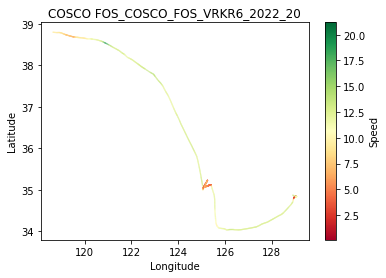

보간법 전 일반 평균 속도 : 10.84341085271318
보간법 전 일반 속도 표준편차: 2.994517557558759
보간법 전 저속 제거 평균 속도 : 10.84341085271318
보간법 전 저속 제거 속도 표준편차: 2.994517557558759
-
보간법 후 일반 평균 속도 : 9.504384275133198
보간법 후 일반 속도 표준편차: 3.38464396887107
보간법 후 저속 제거 평균 속도 : 9.504384275133198
보간법 후 저속 제거 속도 표준편차: 3.38464396887107


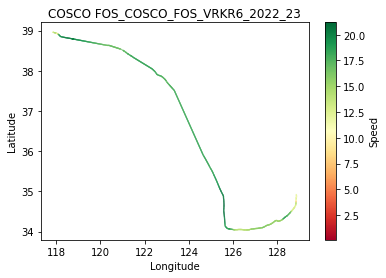

보간법 전 일반 평균 속도 : 16.75807860262009
보간법 전 일반 속도 표준편차: 2.649105009334675
보간법 전 저속 제거 평균 속도 : 16.75807860262009
보간법 전 저속 제거 속도 표준편차: 2.649105009334675
-
보간법 후 일반 평균 속도 : 17.236317104560104
보간법 후 일반 속도 표준편차: 2.227323542773959
보간법 후 저속 제거 평균 속도 : 17.236317104560104
보간법 후 저속 제거 속도 표준편차: 2.227323542773959


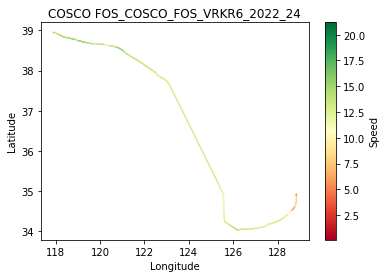

보간법 전 일반 평균 속도 : 12.309897610921503
보간법 전 일반 속도 표준편차: 1.9405006816493167
보간법 전 저속 제거 평균 속도 : 12.309897610921503
보간법 전 저속 제거 속도 표준편차: 1.9405006816493167
-
보간법 후 일반 평균 속도 : 12.660684780696224
보간법 후 일반 속도 표준편차: 1.7223205092593743
보간법 후 저속 제거 평균 속도 : 12.660684780696224
보간법 후 저속 제거 속도 표준편차: 1.7223205092593743


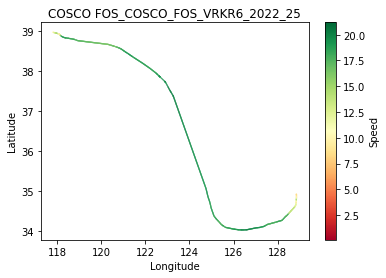

보간법 전 일반 평균 속도 : 17.315503875968993
보간법 전 일반 속도 표준편차: 2.7140332760836965
보간법 전 저속 제거 평균 속도 : 17.315503875968993
보간법 전 저속 제거 속도 표준편차: 2.7140332760836965
-
보간법 후 일반 평균 속도 : 17.84098496809962
보간법 후 일반 속도 표준편차: 2.336286654553293
보간법 후 저속 제거 평균 속도 : 17.84098496809962
보간법 후 저속 제거 속도 표준편차: 2.336286654553293


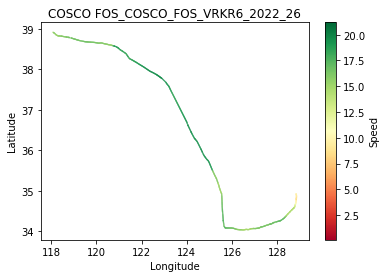

보간법 전 일반 평균 속도 : 16.46241379310345
보간법 전 일반 속도 표준편차: 1.9907734589655557
보간법 전 저속 제거 평균 속도 : 16.46241379310345
보간법 전 저속 제거 속도 표준편차: 1.9907734589655557
-
보간법 후 일반 평균 속도 : 16.837835871206657
보간법 후 일반 속도 표준편차: 2.2246211925695936
보간법 후 저속 제거 평균 속도 : 16.837835871206657
보간법 후 저속 제거 속도 표준편차: 2.2246211925695936


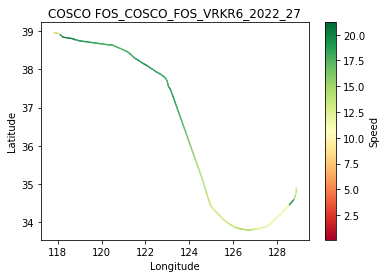

보간법 전 일반 평균 속도 : 14.273705179282867
보간법 전 일반 속도 표준편차: 3.0860761197243773
보간법 전 저속 제거 평균 속도 : 14.273705179282867
보간법 전 저속 제거 속도 표준편차: 3.0860761197243773
-
보간법 후 일반 평균 속도 : 15.558482547231597
보간법 후 일반 속도 표준편차: 2.9965360193683765
보간법 후 저속 제거 평균 속도 : 15.558482547231597
보간법 후 저속 제거 속도 표준편차: 2.9965360193683765


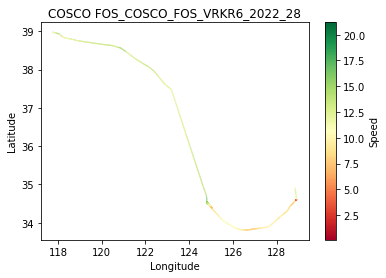

보간법 전 일반 평균 속도 : 10.858545454545455
보간법 전 일반 속도 표준편차: 2.3006087881871635
보간법 전 저속 제거 평균 속도 : 10.858545454545455
보간법 전 저속 제거 속도 표준편차: 2.3006087881871635
-
보간법 후 일반 평균 속도 : 11.190793096599755
보간법 후 일반 속도 표준편차: 2.717573355329743
보간법 후 저속 제거 평균 속도 : 11.190793096599755
보간법 후 저속 제거 속도 표준편차: 2.717573355329743


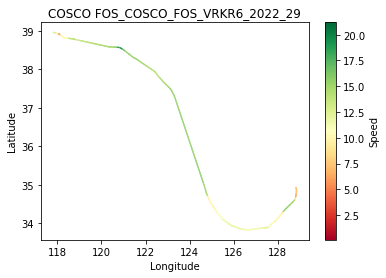

보간법 전 일반 평균 속도 : 11.938951310861425
보간법 전 일반 속도 표준편차: 2.695788212023827
보간법 전 저속 제거 평균 속도 : 11.938951310861425
보간법 전 저속 제거 속도 표준편차: 2.695788212023827
-
보간법 후 일반 평균 속도 : 12.979532855823654
보간법 후 일반 속도 표준편차: 2.550229317778519
보간법 후 저속 제거 평균 속도 : 12.979532855823654
보간법 후 저속 제거 속도 표준편차: 2.550229317778519


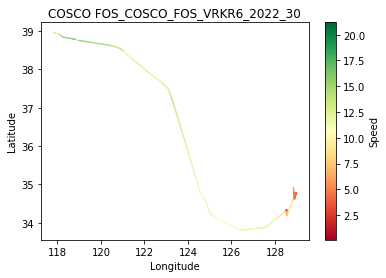

보간법 전 일반 평균 속도 : 10.505362776025237
보간법 전 일반 속도 표준편차: 2.8900094626015407
보간법 전 저속 제거 평균 속도 : 10.505362776025237
보간법 전 저속 제거 속도 표준편차: 2.8900094626015407
-
보간법 후 일반 평균 속도 : 9.613927595977106
보간법 후 일반 속도 표준편차: 3.6497427225278494
보간법 후 저속 제거 평균 속도 : 9.613927595977106
보간법 후 저속 제거 속도 표준편차: 3.6497427225278494


In [10]:
max_speed_list = []
min_speed_list = []
for i in COSCO_FOS_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in COSCO_FOS_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
#     min_speed = data["speed"].min()
#     max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=1000)

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_1000.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

    # Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

        # Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [11]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['COSCO_FOS_VRKR6_2022_20',
 'COSCO_FOS_VRKR6_2022_24',
 'COSCO_FOS_VRKR6_2022_28',
 'COSCO_FOS_VRKR6_2022_29',
 'COSCO_FOS_VRKR6_2022_30']

In [12]:
high_speed_path_data =[]
low_speed_path_data =[]
interpolation_number = "1000"
for i in COSCO_FOS_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [13]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_cosco_fos_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [14]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_cosco_fos_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

### interpolation 2500

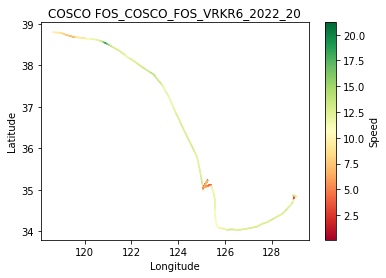

보간법 전 일반 평균 속도 : 10.84341085271318
보간법 전 일반 속도 표준편차: 2.994517557558759
보간법 전 저속 제거 평균 속도 : 10.84341085271318
보간법 전 저속 제거 속도 표준편차: 2.994517557558759
-
보간법 후 일반 평균 속도 : 9.503499972291229
보간법 후 일반 속도 표준편차: 3.384229326731807
보간법 후 저속 제거 평균 속도 : 9.503499972291229
보간법 후 저속 제거 속도 표준편차: 3.384229326731807


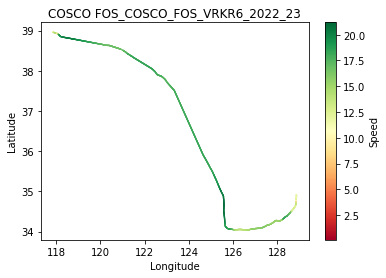

보간법 전 일반 평균 속도 : 16.75807860262009
보간법 전 일반 속도 표준편차: 2.649105009334675
보간법 전 저속 제거 평균 속도 : 16.75807860262009
보간법 전 저속 제거 속도 표준편차: 2.649105009334675
-
보간법 후 일반 평균 속도 : 17.239132323571702
보간법 후 일반 속도 표준편차: 2.22449704628472
보간법 후 저속 제거 평균 속도 : 17.239132323571702
보간법 후 저속 제거 속도 표준편차: 2.22449704628472


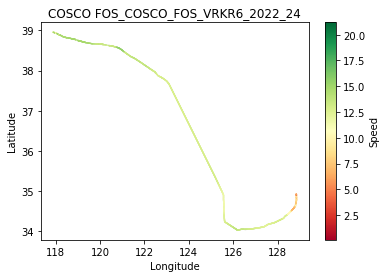

보간법 전 일반 평균 속도 : 12.309897610921503
보간법 전 일반 속도 표준편차: 1.9405006816493167
보간법 전 저속 제거 평균 속도 : 12.309897610921503
보간법 전 저속 제거 속도 표준편차: 1.9405006816493167
-
보간법 후 일반 평균 속도 : 12.663005131446933
보간법 후 일반 속도 표준편차: 1.7191972695350255
보간법 후 저속 제거 평균 속도 : 12.663005131446933
보간법 후 저속 제거 속도 표준편차: 1.7191972695350255


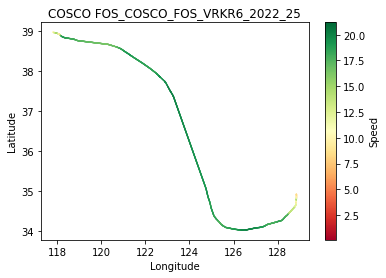

보간법 전 일반 평균 속도 : 17.315503875968993
보간법 전 일반 속도 표준편차: 2.7140332760836965
보간법 전 저속 제거 평균 속도 : 17.315503875968993
보간법 전 저속 제거 속도 표준편차: 2.7140332760836965
-
보간법 후 일반 평균 속도 : 17.846095420717454
보간법 후 일반 속도 표준편차: 2.3266615794870074
보간법 후 저속 제거 평균 속도 : 17.846095420717454
보간법 후 저속 제거 속도 표준편차: 2.3266615794870074


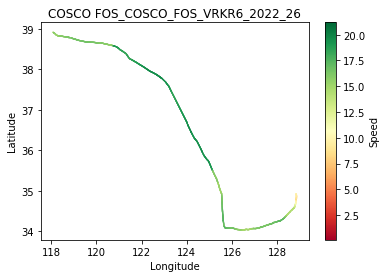

보간법 전 일반 평균 속도 : 16.46241379310345
보간법 전 일반 속도 표준편차: 1.9907734589655557
보간법 전 저속 제거 평균 속도 : 16.46241379310345
보간법 전 저속 제거 속도 표준편차: 1.9907734589655557
-
보간법 후 일반 평균 속도 : 16.840581367569204
보간법 후 일반 속도 표준편차: 2.2208261993775245
보간법 후 저속 제거 평균 속도 : 16.840581367569204
보간법 후 저속 제거 속도 표준편차: 2.2208261993775245


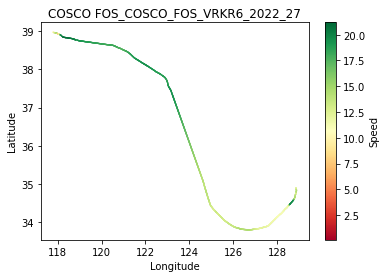

보간법 전 일반 평균 속도 : 14.273705179282867
보간법 전 일반 속도 표준편차: 3.0860761197243773
보간법 전 저속 제거 평균 속도 : 14.273705179282867
보간법 전 저속 제거 속도 표준편차: 3.0860761197243773
-
보간법 후 일반 평균 속도 : 15.56189778459482
보간법 후 일반 속도 표준편차: 2.9933083216797463
보간법 후 저속 제거 평균 속도 : 15.56189778459482
보간법 후 저속 제거 속도 표준편차: 2.9933083216797463


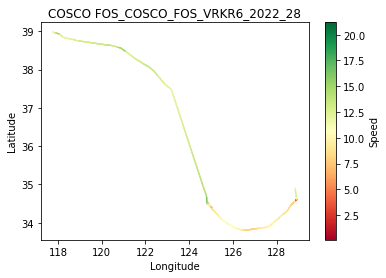

보간법 전 일반 평균 속도 : 10.858545454545455
보간법 전 일반 속도 표준편차: 2.3006087881871635
보간법 전 저속 제거 평균 속도 : 10.858545454545455
보간법 전 저속 제거 속도 표준편차: 2.3006087881871635
-
보간법 후 일반 평균 속도 : 11.192897282692872
보간법 후 일반 속도 표준편차: 2.7168330870995785
보간법 후 저속 제거 평균 속도 : 11.192897282692872
보간법 후 저속 제거 속도 표준편차: 2.7168330870995785


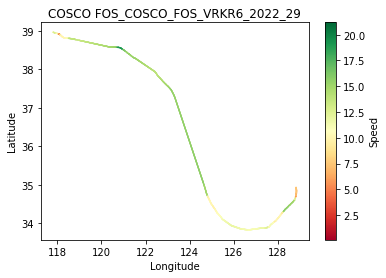

보간법 전 일반 평균 속도 : 11.938951310861425
보간법 전 일반 속도 표준편차: 2.695788212023827
보간법 전 저속 제거 평균 속도 : 11.938951310861425
보간법 전 저속 제거 속도 표준편차: 2.695788212023827
-
보간법 후 일반 평균 속도 : 12.982036412674791
보간법 후 일반 속도 표준편차: 2.548185396162599
보간법 후 저속 제거 평균 속도 : 12.982036412674791
보간법 후 저속 제거 속도 표준편차: 2.548185396162599


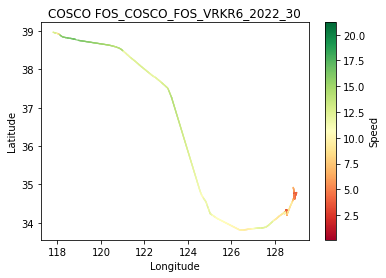

보간법 전 일반 평균 속도 : 10.505362776025237
보간법 전 일반 속도 표준편차: 2.8900094626015407
보간법 전 저속 제거 평균 속도 : 10.505362776025237
보간법 전 저속 제거 속도 표준편차: 2.8900094626015407
-
보간법 후 일반 평균 속도 : 9.613471230370811
보간법 후 일반 속도 표준편차: 3.6492468093329107
보간법 후 저속 제거 평균 속도 : 9.613471230370811
보간법 후 저속 제거 속도 표준편차: 3.6492468093329107


In [15]:
max_speed_list = []
min_speed_list = []
for i in COSCO_FOS_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in COSCO_FOS_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
#     min_speed = data["speed"].min()
#     max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=2500)

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_2500.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

    # Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

        # Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [16]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['COSCO_FOS_VRKR6_2022_20',
 'COSCO_FOS_VRKR6_2022_24',
 'COSCO_FOS_VRKR6_2022_28',
 'COSCO_FOS_VRKR6_2022_29',
 'COSCO_FOS_VRKR6_2022_30']

In [17]:
high_speed_path_data =[]
low_speed_path_data =[]
interpolation_number = "2500"
for i in COSCO_FOS_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [18]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_cosco_fos_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [19]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_cosco_fos_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

### interpolation 5000

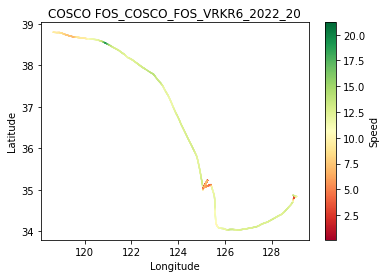

보간법 전 일반 평균 속도 : 10.84341085271318
보간법 전 일반 속도 표준편차: 2.994517557558759
보간법 전 저속 제거 평균 속도 : 10.84341085271318
보간법 전 저속 제거 속도 표준편차: 2.994517557558759
-
보간법 후 일반 평균 속도 : 9.5030572504981
보간법 후 일반 속도 표준편차: 3.383945740905719
보간법 후 저속 제거 평균 속도 : 9.5030572504981
보간법 후 저속 제거 속도 표준편차: 3.383945740905719


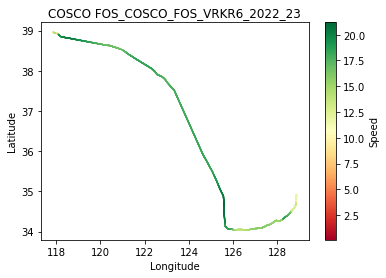

보간법 전 일반 평균 속도 : 16.75807860262009
보간법 전 일반 속도 표준편차: 2.649105009334675
보간법 전 저속 제거 평균 속도 : 16.75807860262009
보간법 전 저속 제거 속도 표준편차: 2.649105009334675
-
보간법 후 일반 평균 속도 : 17.240103145372803
보간법 후 일반 속도 표준편차: 2.2233064148077197
보간법 후 저속 제거 평균 속도 : 17.240103145372803
보간법 후 저속 제거 속도 표준편차: 2.2233064148077197


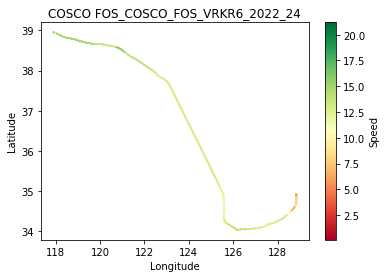

보간법 전 일반 평균 속도 : 12.309897610921503
보간법 전 일반 속도 표준편차: 1.9405006816493167
보간법 전 저속 제거 평균 속도 : 12.309897610921503
보간법 전 저속 제거 속도 표준편차: 1.9405006816493167
-
보간법 후 일반 평균 속도 : 12.663576155467169
보간법 후 일반 속도 표준편차: 1.7179709048919924
보간법 후 저속 제거 평균 속도 : 12.663576155467169
보간법 후 저속 제거 속도 표준편차: 1.7179709048919924


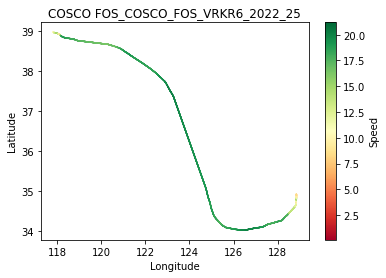

보간법 전 일반 평균 속도 : 17.315503875968993
보간법 전 일반 속도 표준편차: 2.7140332760836965
보간법 전 저속 제거 평균 속도 : 17.315503875968993
보간법 전 저속 제거 속도 표준편차: 2.7140332760836965
-
보간법 후 일반 평균 속도 : 17.847849658008236
보간법 후 일반 속도 표준편차: 2.323319948692694
보간법 후 저속 제거 평균 속도 : 17.847849658008236
보간법 후 저속 제거 속도 표준편차: 2.323319948692694


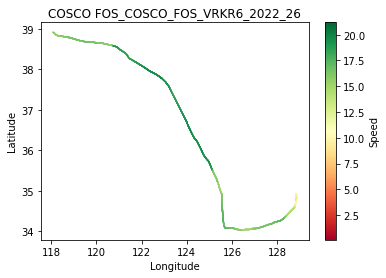

보간법 전 일반 평균 속도 : 16.46241379310345
보간법 전 일반 속도 표준편차: 1.9907734589655557
보간법 전 저속 제거 평균 속도 : 16.46241379310345
보간법 전 저속 제거 속도 표준편차: 1.9907734589655557
-
보간법 후 일반 평균 속도 : 16.84151822606502
보간법 후 일반 속도 표준편차: 2.219581670153568
보간법 후 저속 제거 평균 속도 : 16.84151822606502
보간법 후 저속 제거 속도 표준편차: 2.219581670153568


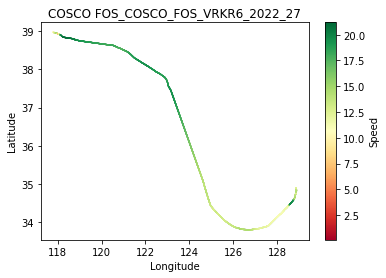

보간법 전 일반 평균 속도 : 14.273705179282867
보간법 전 일반 속도 표준편차: 3.0860761197243773
보간법 전 저속 제거 평균 속도 : 14.273705179282867
보간법 전 저속 제거 속도 표준편차: 3.0860761197243773
-
보간법 후 일반 평균 속도 : 15.562861695290426
보간법 후 일반 속도 표준편차: 2.992537033249337
보간법 후 저속 제거 평균 속도 : 15.562861695290426
보간법 후 저속 제거 속도 표준편차: 2.992537033249337


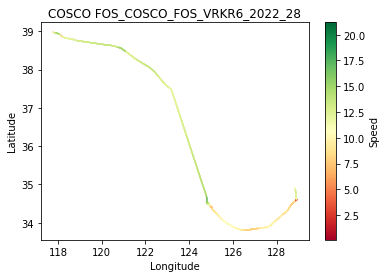

보간법 전 일반 평균 속도 : 10.858545454545455
보간법 전 일반 속도 표준편차: 2.3006087881871635
보간법 전 저속 제거 평균 속도 : 10.858545454545455
보간법 전 저속 제거 속도 표준편차: 2.3006087881871635
-
보간법 후 일반 평균 속도 : 11.193423919527975
보간법 후 일반 속도 표준편차: 2.716275812563096
보간법 후 저속 제거 평균 속도 : 11.193423919527975
보간법 후 저속 제거 속도 표준편차: 2.716275812563096


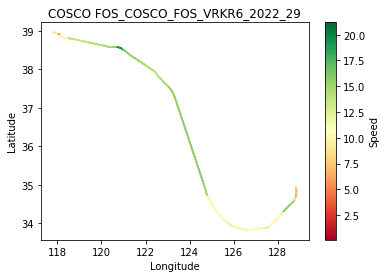

보간법 전 일반 평균 속도 : 11.938951310861425
보간법 전 일반 속도 표준편차: 2.695788212023827
보간법 전 저속 제거 평균 속도 : 11.938951310861425
보간법 전 저속 제거 속도 표준편차: 2.695788212023827
-
보간법 후 일반 평균 속도 : 12.982846442831885
보간법 후 일반 속도 표준편차: 2.5474517280226245
보간법 후 저속 제거 평균 속도 : 12.982846442831885
보간법 후 저속 제거 속도 표준편차: 2.5474517280226245


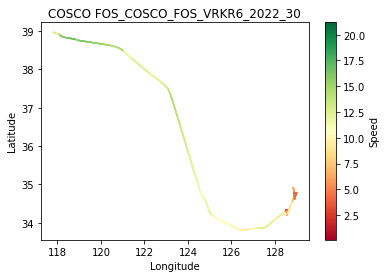

보간법 전 일반 평균 속도 : 10.505362776025237
보간법 전 일반 속도 표준편차: 2.8900094626015407
보간법 전 저속 제거 평균 속도 : 10.505362776025237
보간법 전 저속 제거 속도 표준편차: 2.8900094626015407
-
보간법 후 일반 평균 속도 : 9.613601788256938
보간법 후 일반 속도 표준편차: 3.6490937807604684
보간법 후 저속 제거 평균 속도 : 9.613601788256938
보간법 후 저속 제거 속도 표준편차: 3.6490937807604684


In [20]:
max_speed_list = []
min_speed_list = []
for i in COSCO_FOS_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in COSCO_FOS_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
#     min_speed = data["speed"].min()
#     max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=5000)

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_5000.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

    # Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

        # Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [21]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['COSCO_FOS_VRKR6_2022_20',
 'COSCO_FOS_VRKR6_2022_24',
 'COSCO_FOS_VRKR6_2022_28',
 'COSCO_FOS_VRKR6_2022_29',
 'COSCO_FOS_VRKR6_2022_30']

In [22]:
high_speed_path_data =[]
low_speed_path_data =[]
interpolation_number = "5000"
for i in COSCO_FOS_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [23]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_cosco_fos_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [24]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_cosco_fos_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

### interpolation 7500

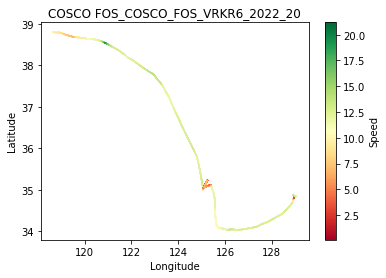

보간법 전 일반 평균 속도 : 10.84341085271318
보간법 전 일반 속도 표준편차: 2.994517557558759
보간법 전 저속 제거 평균 속도 : 10.84341085271318
보간법 전 저속 제거 속도 표준편차: 2.994517557558759
-
보간법 후 일반 평균 속도 : 9.502925057852943
보간법 후 일반 속도 표준편차: 3.383862066942785
보간법 후 저속 제거 평균 속도 : 9.502925057852943
보간법 후 저속 제거 속도 표준편차: 3.383862066942785


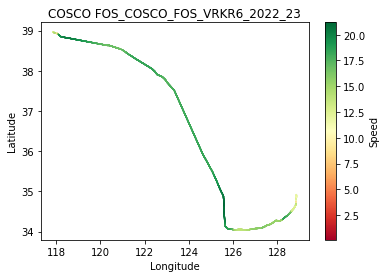

보간법 전 일반 평균 속도 : 16.75807860262009
보간법 전 일반 속도 표준편차: 2.649105009334675
보간법 전 저속 제거 평균 속도 : 16.75807860262009
보간법 전 저속 제거 속도 표준편차: 2.649105009334675
-
보간법 후 일반 평균 속도 : 17.240418596080694
보간법 후 일반 속도 표준편차: 2.22293966606666
보간법 후 저속 제거 평균 속도 : 17.240418596080694
보간법 후 저속 제거 속도 표준편차: 2.22293966606666


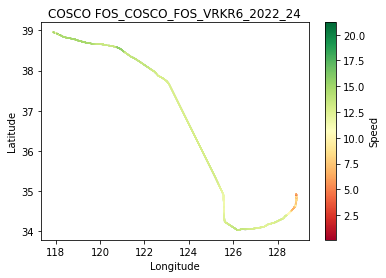

보간법 전 일반 평균 속도 : 12.309897610921503
보간법 전 일반 속도 표준편차: 1.9405006816493167
보간법 전 저속 제거 평균 속도 : 12.309897610921503
보간법 전 저속 제거 속도 표준편차: 1.9405006816493167
-
보간법 후 일반 평균 속도 : 12.663778784354195
보간법 후 일반 속도 표준편차: 1.71757273590921
보간법 후 저속 제거 평균 속도 : 12.663778784354195
보간법 후 저속 제거 속도 표준편차: 1.71757273590921


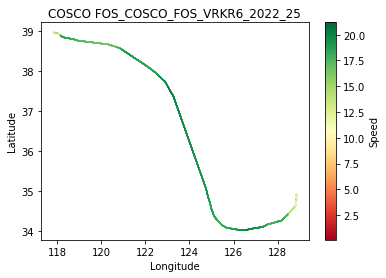

보간법 전 일반 평균 속도 : 17.315503875968993
보간법 전 일반 속도 표준편차: 2.7140332760836965
보간법 전 저속 제거 평균 속도 : 17.315503875968993
보간법 전 저속 제거 속도 표준편차: 2.7140332760836965
-
보간법 후 일반 평균 속도 : 17.8484471578348
보간법 후 일반 속도 표준편차: 2.322191022123783
보간법 후 저속 제거 평균 속도 : 17.8484471578348
보간법 후 저속 제거 속도 표준편차: 2.322191022123783


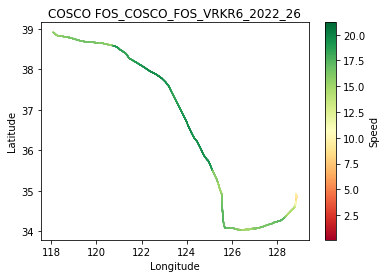

보간법 전 일반 평균 속도 : 16.46241379310345
보간법 전 일반 속도 표준편차: 1.9907734589655557
보간법 전 저속 제거 평균 속도 : 16.46241379310345
보간법 전 저속 제거 속도 표준편차: 1.9907734589655557
-
보간법 후 일반 평균 속도 : 16.841825393264894
보간법 후 일반 속도 표준편차: 2.2191601000641854
보간법 후 저속 제거 평균 속도 : 16.841825393264894
보간법 후 저속 제거 속도 표준편차: 2.2191601000641854


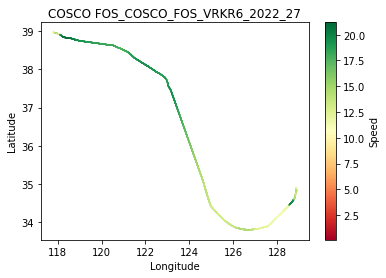

보간법 전 일반 평균 속도 : 14.273705179282867
보간법 전 일반 속도 표준편차: 3.0860761197243773
보간법 전 저속 제거 평균 속도 : 14.273705179282867
보간법 전 저속 제거 속도 표준편차: 3.0860761197243773
-
보간법 후 일반 평균 속도 : 15.56317075186255
보간법 후 일반 속도 표준편차: 2.9922499060719527
보간법 후 저속 제거 평균 속도 : 15.56317075186255
보간법 후 저속 제거 속도 표준편차: 2.9922499060719527


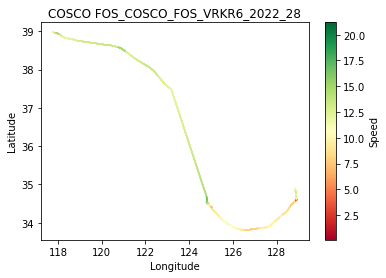

보간법 전 일반 평균 속도 : 10.858545454545455
보간법 전 일반 속도 표준편차: 2.3006087881871635
보간법 전 저속 제거 평균 속도 : 10.858545454545455
보간법 전 저속 제거 속도 표준편차: 2.3006087881871635
-
보간법 후 일반 평균 속도 : 11.193601815744028
보간법 후 일반 속도 표준편차: 2.716090180093691
보간법 후 저속 제거 평균 속도 : 11.193601815744028
보간법 후 저속 제거 속도 표준편차: 2.716090180093691


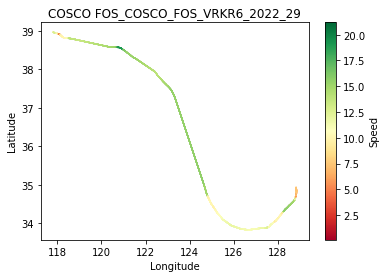

보간법 전 일반 평균 속도 : 11.938951310861425
보간법 전 일반 속도 표준편차: 2.695788212023827
보간법 전 저속 제거 평균 속도 : 11.938951310861425
보간법 전 저속 제거 속도 표준편차: 2.695788212023827
-
보간법 후 일반 평균 속도 : 12.983094652947925
보간법 후 일반 속도 표준편차: 2.5472108968599003
보간법 후 저속 제거 평균 속도 : 12.983094652947925
보간법 후 저속 제거 속도 표준편차: 2.5472108968599003


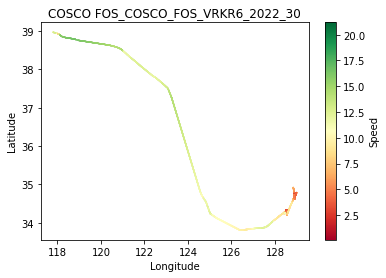

보간법 전 일반 평균 속도 : 10.505362776025237
보간법 전 일반 속도 표준편차: 2.8900094626015407
보간법 전 저속 제거 평균 속도 : 10.505362776025237
보간법 전 저속 제거 속도 표준편차: 2.8900094626015407
-
보간법 후 일반 평균 속도 : 9.61361228948463
보간법 후 일반 속도 표준편차: 3.6490680014359858
보간법 후 저속 제거 평균 속도 : 9.61361228948463
보간법 후 저속 제거 속도 표준편차: 3.6490680014359858


In [25]:
max_speed_list = []
min_speed_list = []
for i in COSCO_FOS_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in COSCO_FOS_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
#     min_speed = data["speed"].min()
#     max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=7500)

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_7500.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

    # Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

        # Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

In [26]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['COSCO_FOS_VRKR6_2022_20',
 'COSCO_FOS_VRKR6_2022_24',
 'COSCO_FOS_VRKR6_2022_28',
 'COSCO_FOS_VRKR6_2022_29',
 'COSCO_FOS_VRKR6_2022_30']

In [27]:
high_speed_path_data =[]
low_speed_path_data =[]
interpolation_number = "7500"
for i in COSCO_FOS_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [28]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_cosco_fos_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [29]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_cosco_fos_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

### interpolation 10000

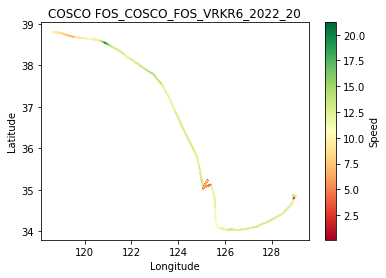

보간법 전 일반 평균 속도 : 10.84341085271318
보간법 전 일반 속도 표준편차: 2.994517557558759
보간법 전 저속 제거 평균 속도 : 10.84341085271318
보간법 전 저속 제거 속도 표준편차: 2.994517557558759
-
보간법 후 일반 평균 속도 : 9.502855954045097
보간법 후 일반 속도 표준편차: 3.3838226026451164
보간법 후 저속 제거 평균 속도 : 9.502855954045097
보간법 후 저속 제거 속도 표준편차: 3.3838226026451164


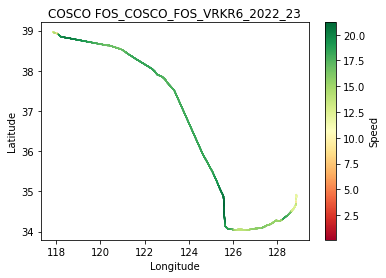

보간법 전 일반 평균 속도 : 16.75807860262009
보간법 전 일반 속도 표준편차: 2.649105009334675
보간법 전 저속 제거 평균 속도 : 16.75807860262009
보간법 전 저속 제거 속도 표준편차: 2.649105009334675
-
보간법 후 일반 평균 속도 : 17.240594055461848
보간법 후 일반 속도 표준편차: 2.2227170921887347
보간법 후 저속 제거 평균 속도 : 17.240594055461848
보간법 후 저속 제거 속도 표준편차: 2.2227170921887347


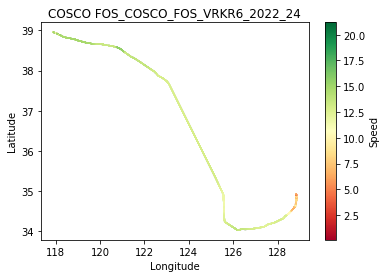

보간법 전 일반 평균 속도 : 12.309897610921503
보간법 전 일반 속도 표준편차: 1.9405006816493167
보간법 전 저속 제거 평균 속도 : 12.309897610921503
보간법 전 저속 제거 속도 표준편차: 1.9405006816493167
-
보간법 후 일반 평균 속도 : 12.66388142216077
보간법 후 일반 속도 표준편차: 1.7173707764247432
보간법 후 저속 제거 평균 속도 : 12.66388142216077
보간법 후 저속 제거 속도 표준편차: 1.7173707764247432


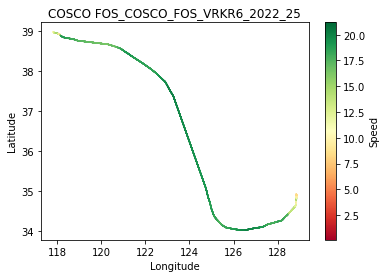

보간법 전 일반 평균 속도 : 17.315503875968993
보간법 전 일반 속도 표준편차: 2.7140332760836965
보간법 전 저속 제거 평균 속도 : 17.315503875968993
보간법 전 저속 제거 속도 표준편차: 2.7140332760836965
-
보간법 후 일반 평균 속도 : 17.848733299065696
보간법 후 일반 속도 표준편차: 2.3216393176047143
보간법 후 저속 제거 평균 속도 : 17.848733299065696
보간법 후 저속 제거 속도 표준편차: 2.3216393176047143


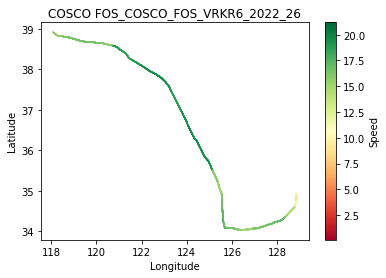

보간법 전 일반 평균 속도 : 16.46241379310345
보간법 전 일반 속도 표준편차: 1.9907734589655557
보간법 전 저속 제거 평균 속도 : 16.46241379310345
보간법 전 저속 제거 속도 표준편차: 1.9907734589655557
-
보간법 후 일반 평균 속도 : 16.841980107657207
보간법 후 일반 속도 표준편차: 2.2189569194214553
보간법 후 저속 제거 평균 속도 : 16.841980107657207
보간법 후 저속 제거 속도 표준편차: 2.2189569194214553


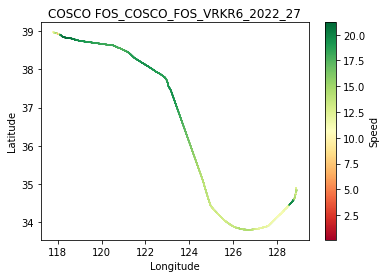

보간법 전 일반 평균 속도 : 14.273705179282867
보간법 전 일반 속도 표준편차: 3.0860761197243773
보간법 전 저속 제거 평균 속도 : 14.273705179282867
보간법 전 저속 제거 속도 표준편차: 3.0860761197243773
-
보간법 후 일반 평균 속도 : 15.56333595131496
보간법 후 일반 속도 표준편차: 2.9921050738882284
보간법 후 저속 제거 평균 속도 : 15.56333595131496
보간법 후 저속 제거 속도 표준편차: 2.9921050738882284


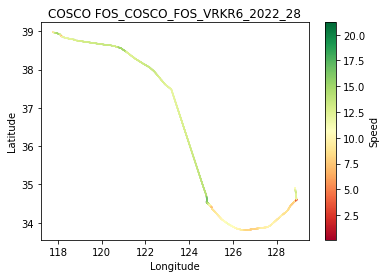

보간법 전 일반 평균 속도 : 10.858545454545455
보간법 전 일반 속도 표준편차: 2.3006087881871635
보간법 전 저속 제거 평균 속도 : 10.858545454545455
보간법 전 저속 제거 속도 표준편차: 2.3006087881871635
-
보간법 후 일반 평균 속도 : 11.193688715595577
보간법 후 일반 속도 표준편차: 2.716019361373682
보간법 후 저속 제거 평균 속도 : 11.193688715595577
보간법 후 저속 제거 속도 표준편차: 2.716019361373682


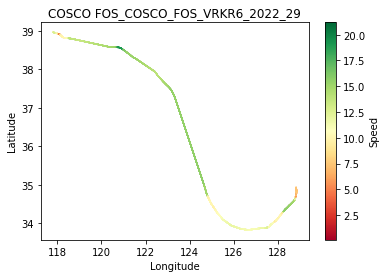

보간법 전 일반 평균 속도 : 11.938951310861425
보간법 전 일반 속도 표준편차: 2.695788212023827
보간법 전 저속 제거 평균 속도 : 11.938951310861425
보간법 전 저속 제거 속도 표준편차: 2.695788212023827
-
보간법 후 일반 평균 속도 : 12.983241007679503
보간법 후 일반 속도 표준편차: 2.5470938935237695
보간법 후 저속 제거 평균 속도 : 12.983241007679503
보간법 후 저속 제거 속도 표준편차: 2.5470938935237695


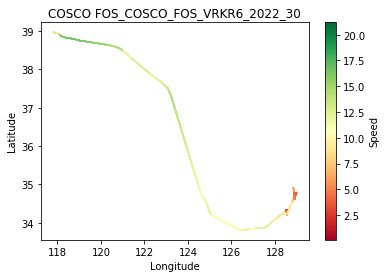

보간법 전 일반 평균 속도 : 10.505362776025237
보간법 전 일반 속도 표준편차: 2.8900094626015407
보간법 전 저속 제거 평균 속도 : 10.505362776025237
보간법 전 저속 제거 속도 표준편차: 2.8900094626015407
-
보간법 후 일반 평균 속도 : 9.613636220424095
보간법 후 일반 속도 표준편차: 3.649020055411645
보간법 후 저속 제거 평균 속도 : 9.613636220424095
보간법 후 저속 제거 속도 표준편차: 3.649020055411645


In [30]:
max_speed_list = []
min_speed_list = []
for i in COSCO_FOS_voyages_list:
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    min_speed = data["speed"].min()
    max_speed = data["speed"].max()
    max_speed_list.append(max_speed)
    min_speed_list.append(min_speed)
min_speed = np.min(min_speed_list)
max_speed = np.max(max_speed_list)

norm = plt.Normalize(min_speed, max_speed)
cmap = plt.get_cmap('RdYlGn')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# Create a ScalarMappable with the colormap and normalization

mean_speed_dict = {"voyage" : [],"mean_speed" : []}

for i in COSCO_FOS_voyages_list:
    fig, ax = plt.subplots()
    
    df = pd.read_csv(upper_china_path_dir + i + ".csv")
    data = df
    # 3노트 이하 데이터 삭제
    data = data[data["speed"] >= 3]
    data.reset_index(inplace=True, drop=True)
#     min_speed = data["speed"].min()
#     max_speed = data["speed"].max()
    vessel_name = data["vessel_name"].values[0]
    voyage_name = i.split('processed')[0]
    speed_std = data["speed"].std()
    
    
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['timestamp_seconds'] = (data['timestamp'] - pd.Timestamp("1970-01-01")) / pd.Timedelta(seconds=1)

    # Create a function that performs the interpolation
    interp_longitude = interpolate.interp1d(data['timestamp_seconds'], data['longitude'])
    interp_latitude = interpolate.interp1d(data['timestamp_seconds'], data['latitude'])
    interp_speed = interpolate.interp1d(data['timestamp_seconds'], data['speed'])

    # Specify the range of new x values for the interpolation
    new_x = np.linspace(data['timestamp_seconds'].min(), data['timestamp_seconds'].max(), num=10000)

    # Use the interpolation function to estimate y values for the new x values
    interp_longitude_y = interp_longitude(new_x)
    interp_latitude_y = interp_latitude(new_x)
    interp_speed_y = interp_speed(new_x)
    # Create new DataFrame with the interpolated values
    interp_data = pd.DataFrame({'timestamp': new_x, 'longitude': interp_longitude_y, 'latitude': interp_latitude_y, 'speed': interp_speed_y})
#     i = i.split("processed")[0]
    interp_data.to_csv(upper_china_path_dir + 'interpolated/'+ f"interpolated_{i}_below_3knot_10000.csv", encoding="utf-8 sig", header=True, index=False)
    
    # plot the data
    sc = ax.scatter(interp_data['longitude'], interp_data['latitude'],c = interp_data['speed'], cmap = cmap, norm = norm, s=0.1)

    # Add axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"{vessel_name}_{voyage_name}")
    # Add a colorbar
    cbar = plt.colorbar(sc,label='Speed')

        # Show the plot
    plt.show()
        
    check = data["speed"].apply(lambda x : True if x < 3 else False)
    s = data.drop(data[check].index)["speed"]
    print(f"보간법 전 일반 평균 속도 : {data['speed'].mean()}")
    print(f"보간법 전 일반 속도 표준편차: {data['speed'].std()}")
    print(f"보간법 전 저속 제거 평균 속도 : {s.mean()}")
    print(f'보간법 전 저속 제거 속도 표준편차: {s.std()}')
    print('-')
    check = interp_data["speed"].apply(lambda x : True if x < 3 else False)
    s = interp_data.drop(interp_data[check].index)["speed"]
    print(f"보간법 후 일반 평균 속도 : {interp_data['speed'].mean()}")
    print(f"보간법 후 일반 속도 표준편차: {interp_data['speed'].std()}")
    print(f"보간법 후 저속 제거 평균 속도 : {s.mean()}")
    mean_speed_dict['voyage'].append(voyage_name)
    mean_speed_dict['mean_speed'].append(s.mean())
    print(f'보간법 후 저속 제거 속도 표준편차: {s.std()}')

- 속도가 저속(3노트 이하)인 경우는 어떻게 계산할 것인가?
- segment를 나눠서 해야 하나? 전체 평균 속도로 전체 계산을 하면 너무 차이가 클 것 같다.

In [31]:
mean_speed_df = pd.DataFrame(mean_speed_dict)
list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage)

['COSCO_FOS_VRKR6_2022_20',
 'COSCO_FOS_VRKR6_2022_24',
 'COSCO_FOS_VRKR6_2022_28',
 'COSCO_FOS_VRKR6_2022_29',
 'COSCO_FOS_VRKR6_2022_30']

In [32]:
high_speed_path_data =[]
low_speed_path_data =[]
interpolation_number = "10000"
for i in COSCO_FOS_voyages_list:
    i = i.split("processed")[0]
    if i in list(mean_speed_df[mean_speed_df["mean_speed"] < 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        low_speed_path_data.append(df)
    elif i in list(mean_speed_df[mean_speed_df["mean_speed"] >= 14].voyage):
        i = "interpolated/interpolated_" + i + f'processed_below_3knot_{interpolation_number}'
        df = pd.read_csv(upper_china_path_dir + i + ".csv")
        high_speed_path_data.append(df)

In [33]:
all_data = pd.concat(low_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_cosco_fos_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [34]:
all_data = pd.concat(high_speed_path_data)

# Add a new index column representing the row number
all_data['index'] = range(len(all_data))
all_data["index"] = all_data.index
concaternated_df = all_data.groupby('index').mean()
concaternated_df.to_csv(f"실험/upper_china_cosco_fos_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv", encoding="utf-8 sig",header=True, index=False)

In [35]:
result_df_dict=  {
    "experiment_no" : [],
    "mean_speed" : [],
    "max_speed" : []
}

# ETA 실험 (interpolation 1000), COSCO FOS 26항차

In [36]:
interpolation_number = "1000"

In [37]:
high_speed_interpolated_df = pd.read_csv(f"실험/upper_china_cosco_fos_high_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.668396e+09,117.884550,38.953275,11.650000
1,1.668396e+09,117.897160,38.950401,12.233288
2,1.668396e+09,117.909588,38.947581,12.769996
3,1.668396e+09,117.919868,38.945313,12.914693
4,1.668396e+09,117.930111,38.943053,13.054118
...,...,...,...,...
995,1.668546e+09,128.857926,34.886334,11.051028
996,1.668546e+09,128.855673,34.894031,10.892777
997,1.668547e+09,128.852806,34.902800,10.665128
998,1.668547e+09,128.849934,34.911031,10.607361


In [38]:
low_speed_interpolated_df = pd.read_csv(f"실험/upper_china_cosco_fos_low_speed_below_3_knot_{interpolation_number}_concaternated_df.csv")
low_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.668974e+09,117.979120,38.933880,10.280000
1,1.668974e+09,117.999042,38.931411,11.284773
2,1.668974e+09,118.020469,38.928701,11.845322
3,1.668974e+09,118.041947,38.925976,12.270379
4,1.668975e+09,118.062697,38.923408,12.495747
...,...,...,...,...
995,1.669261e+09,128.885421,34.876251,8.563510
996,1.669261e+09,128.877529,34.885725,8.696599
997,1.669261e+09,128.869482,34.895010,8.792156
998,1.669262e+09,128.861242,34.904517,8.863743


In [39]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

## 고속 (7knot 미만 제거)

### segment

In [40]:
seg_length = int(len(high_speed_interpolated_df) / 20)

In [41]:
high_speed_df_list = []
for i in range(20):
    idx = seg_length * (i + 1)
    if i == 0:
        df = high_speed_interpolated_df.loc[0:idx - 1]
        df.reset_index(inplace=True)
    else:
        df = high_speed_interpolated_df.loc[idx - seg_length:idx - 1]
        df.reset_index(inplace=True)
    high_speed_df_list.append(df)

In [42]:
for df in high_speed_df_list:
    d = df["speed"].mean()
    print(d)

15.35415070606337
18.383626575251213
17.479411749221843
16.890482616810228
18.130500958188044
18.80074640521293
18.74241340272675
18.586008150738238
18.490051795097465
18.210547681122748
17.835824959071076
16.91586286776801
16.92227003577601
17.20871158500804
16.018116712330006
15.640849613397915
15.717468900880785
15.37728199962975
14.451187803697112
12.212587937498352


In [43]:
high_speed_interpolated_df

,timestamp,longitude,latitude,speed
0,1.668396e+09,117.884550,38.953275,11.650000
1,1.668396e+09,117.897160,38.950401,12.233288
2,1.668396e+09,117.909588,38.947581,12.769996
3,1.668396e+09,117.919868,38.945313,12.914693
4,1.668396e+09,117.930111,38.943053,13.054118
...,...,...,...,...
995,1.668546e+09,128.857926,34.886334,11.051028
996,1.668546e+09,128.855673,34.894031,10.892777
997,1.668547e+09,128.852806,34.902800,10.665128
998,1.668547e+09,128.849934,34.911031,10.607361


### segment로 평균 속도 적용 ETA 계산

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [44]:
# 가는 길인데 굳이 오래 돌아갈 필요는 없잖아 알고리즘
def optimal_next_point(current_position, shortest_point_idx, shortest_distance,
                       path_df):
    posi_c = current_position
    latitude_i = path_df.loc[shortest_point_idx, "latitude"]
    longitude_i = path_df.loc[shortest_point_idx, "longitude"]
    posi_i = (latitude_i, longitude_i)
    min_d = shortest_distance
    n = shortest_point_idx + 1
    while True:
        try:
            latitude_n = path_df.loc[n, "latitude"]
            longitude_n = path_df.loc[n, "longitude"]
            posi_n = (latitude_n, longitude_n)
            distance = haversine(posi_c, posi_n, unit="km")
            if n == shortest_point_idx + 1:
                path_distance = haversine(posi_i, posi_n, unit="km")
                paths_distance = path_distance
            else:
                path_distance = haversine(posi_n, posi_previous_n, unit="km")
                paths_distance += path_distance

            if distance < (paths_distance + min_d):
                optimal_next_point_idx = n
                return optimal_next_point_idx
            elif n == path_df.index[-1]:
                print("no better optimal_point")
                return shortest_point_idx + 1
            else:
                n = n + 1
                posi_previous_n = posi_n
        except:
            print("no better optimal_point")
            return shortest_point_idx + 1

In [45]:
# 인덱스 번호를 가지고 항로의 segment 번호를 찾음
# 만약 segment의 마지막 번호라면 seg_no를 하나 더한다.

def find_segment_no(optimal_point_idx, path_df):
    seg_no = optimal_point_idx // (len(path_df) / 20)
    next_no = (optimal_point_idx + 1) // (len(path_df) / 20)
    if seg_no != next_no:
        return int(next_no)
    else:
        return int(seg_no)

In [46]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [47]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - hour) * 60)
    second = ((distance / km_h - hour) * 60 - minute) * 60
    duration = datetime.timedelta(hours=hour,minutes=minute, seconds=second)
    return duration

In [48]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터

    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [49]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 06:49:11.404368
평균: 0 days 02:43:00.801063618


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [50]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [51]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [52]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 06:49:11.404368
평균: 0 days 02:43:00.801063618


In [53]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
35,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.4699,38.6184,15.9,103.0,2022-11-20 06:29:16.324155,2022-11-19 21:28:52,2022-11-19 09:25:09,under way using engine,846.479135,1395.746384,2022-11-21 07:31:14.870005,2022-11-21 07:29:14,0 days 00:02:00.870005
34,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.4380,38.6231,15.9,100.0,2022-11-20 06:24:13.396141,2022-11-19 21:22:57,2022-11-19 06:37:05,under way using engine,849.198642,1400.230537,2022-11-21 07:25:19.870005,2022-11-21 07:29:14,0 days 00:03:54.129995
27,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235,1499.571107,2022-11-21 07:24:44.711282,2022-11-21 07:29:14,0 days 00:04:29.288718
33,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.3539,38.6318,15.9,92.0,2022-11-20 06:09:04.892370,2022-11-19 21:07:51,2022-11-19 06:37:05,under way using engine,856.193143,1411.763663,2022-11-21 07:10:13.870005,2022-11-21 07:29:14,0 days 00:19:00.129995
18,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,119.2443,38.7109,16.5,100.0,2022-11-20 03:02:19.742881,2022-11-19 17:54:44,2022-11-19 04:07:08,under way using engine,947.543060,1628.673936,2022-11-21 06:59:16.501585,2022-11-21 07:29:14,0 days 00:29:57.498415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173,NaT,2022-11-21 07:29:14,NaT
286,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685,NaT,2022-11-21 07:29:14,NaT
287,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903,NaT,2022-11-21 07:29:14,NaT
288,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8493,34.8922,9.4,340.0,2022-11-21 16:35:01.296680,2022-11-21 07:14:04,2022-11-21 07:13:06,under way using engine,9.026448,11.280878,NaT,2022-11-21 07:29:14,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [54]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [55]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [56]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:22:15.970335
평균: 0 days 01:38:28.412887029


In [57]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
208,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.9330,34.0703,15.2,87.0,2022-11-21 08:13:44.474430,2022-11-20 23:13:21,2022-11-20 02:37:09,under way using engine,199.668752,314.123036,2022-11-21 07:11:29.476997,2022-11-21 07:29:14,0 days 00:17:44.523003
232,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.5659,34.1570,16.3,80.0,2022-11-21 10:14:55.789365,2022-11-21 01:12:41,2022-11-21 12:55:07,under way using engine,146.080952,247.608469,2022-11-21 07:09:06.720611,2022-11-21 07:29:14,0 days 00:20:07.279389
184,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.3060,34.0435,15.5,90.0,2022-11-21 06:07:33.845641,2022-11-20 21:07:10,2022-11-20 02:37:09,under way using engine,252.274122,404.861637,2022-11-21 07:08:44.962692,2022-11-21 07:29:14,0 days 00:20:29.037308
168,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.6657,34.1118,17.3,130.0,2022-11-21 04:06:25.860131,2022-11-20 19:05:34,2022-11-20 02:37:09,under way using engine,304.187718,553.366792,2022-11-21 07:07:19.304690,2022-11-21 07:29:14,0 days 00:21:54.695310
207,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.9076,34.0692,15.2,87.0,2022-11-21 08:08:41.839945,2022-11-20 23:08:20,2022-11-20 02:37:09,under way using engine,201.747847,317.393911,2022-11-21 07:06:28.476997,2022-11-21 07:29:14,0 days 00:22:45.523003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.0773,38.9155,14.7,115.0,2022-11-19 23:25:17.670300,2022-11-19 14:21:02,2022-11-19 02:19:09,under way using engine,1049.748068,1599.023661,2022-11-21 04:32:25.380900,2022-11-21 07:29:14,0 days 02:56:48.619100
19,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,119.3940,38.6930,16.5,98.0,2022-11-20 03:22:31.247286,2022-11-19 18:20:35,2022-11-19 04:07:08,under way using engine,934.820885,1606.806565,2022-11-21 04:31:30.883274,2022-11-21 07:29:14,0 days 02:57:43.116726
28,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.0900,38.6471,16.2,97.0,2022-11-20 05:23:39.178122,2022-11-19 20:20:32,2022-11-19 06:37:05,under way using engine,877.622646,1477.288557,2022-11-21 04:29:17.408257,2022-11-21 07:29:14,0 days 02:59:56.591743
10,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.6517,38.7994,16.1,97.0,2022-11-20 01:11:17.023334,2022-11-19 16:10:47,2022-11-19 04:07:08,under way using engine,998.767006,1669.627419,2022-11-21 04:25:43.029665,2022-11-21 07:29:14,0 days 03:03:30.970335


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [58]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [59]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [60]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:38:53.416000
평균: 0 days 01:17:46.541242422


In [61]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
193,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.5608,34.0428,14.8,85.0,2022-11-21 06:58:02.035219,2022-11-20 21:57:17,2022-11-20 02:37:09,under way using engine,231.194151,354.411913,2022-11-21 07:28:42.757505,2022-11-21 07:29:14,0 days 00:00:31.242495
152,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5689,34.5804,16.9,177.0,2022-11-21 02:25:28.882973,2022-11-20 17:24:59,2022-11-20 02:37:09,under way using engine,300.013822,530.427432,2022-11-21 07:28:23.506877,2022-11-21 07:29:14,0 days 00:00:50.493123
221,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.2657,34.1054,16.3,69.0,2022-11-21 09:19:23.849802,2022-11-21 00:16:41,2022-11-20 02:37:09,under way using engine,171.720030,291.066926,2022-11-21 07:30:17.975219,2022-11-21 07:29:14,0 days 00:01:03.975219
126,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.4166,35.1281,15.3,160.0,2022-11-21 00:14:15.094614,2022-11-20 15:14:02,2022-11-20 02:37:09,under way using engine,310.251483,491.323001,2022-11-21 07:27:29.069857,2022-11-21 07:29:14,0 days 00:01:44.930143
247,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.9487,34.2345,16.7,80.0,2022-11-21 11:30:34.901925,2022-11-21 02:24:21,2022-11-21 02:01:07,under way using engine,114.160647,199.001922,2022-11-21 07:27:20.799037,2022-11-21 07:29:14,0 days 00:01:53.200963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-21 01:56:25.500553,2022-11-21 07:29:14,0 days 05:32:48.499447
9,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.5464,38.8090,15.9,99.0,2022-11-20 00:56:08.941787,2022-11-19 15:52:02,2022-11-19 03:43:06,under way using engine,1007.627317,1661.461136,2022-11-21 01:41:37.751499,2022-11-21 07:29:14,0 days 05:47:36.248501
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-11-21 01:41:01.468949,2022-11-21 07:29:14,0 days 05:48:12.531051
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-21 01:25:42.405739,2022-11-21 07:29:14,0 days 06:03:31.594261


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [62]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [63]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = real_speed / d_speed
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [64]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 20:12:45.008250
평균: 0 days 13:52:33.262753977


In [65]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
257,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.2295,34.2969,17.2,65.0,2022-11-21 12:21:03.346554,2022-11-21 03:15:27,2022-11-21 03:07:10,under way using engine,92.241368,166.605474,2022-11-21 07:37:12.382768,2022-11-21 07:29:14,0 days 00:07:58.382768
258,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.2545,34.3066,17.1,65.0,2022-11-21 12:26:06.816446,2022-11-21 03:20:14,2022-11-21 03:07:10,under way using engine,90.034914,161.463281,2022-11-21 07:37:27.304222,2022-11-21 07:29:14,0 days 00:08:13.304222
256,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.1870,34.2807,17.2,65.0,2022-11-21 12:16:00.596096,2022-11-21 03:07:22,2022-11-21 03:07:10,under way using engine,96.003728,173.401013,2022-11-21 07:38:24.240664,2022-11-21 07:29:14,0 days 00:09:10.240664
259,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.2796,34.3171,16.9,60.0,2022-11-21 12:31:09.289919,2022-11-21 03:25:10,2022-11-21 03:07:10,under way using engine,87.767316,155.173491,2022-11-21 07:38:31.566500,2022-11-21 07:29:14,0 days 00:09:17.566500
260,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3007,34.3271,16.9,60.0,2022-11-21 12:36:11.950460,2022-11-21 03:29:27,2022-11-21 03:07:10,under way using engine,85.765909,151.634982,2022-11-21 07:38:53.682242,2022-11-21 07:29:14,0 days 00:09:39.682242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3764,38.8241,15.7,95.0,2022-11-20 00:25:51.522825,2022-11-19 15:21:39,2022-11-19 03:19:08,under way using engine,1021.930852,1662.275118,2022-11-22 23:15:23.335537,2022-11-21 07:29:14,1 days 15:46:09.335537
7,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.4220,38.8213,15.9,95.0,2022-11-20 00:30:54.499802,2022-11-19 15:29:58,2022-11-19 03:19:08,under way using engine,1018.143579,1678.801238,2022-11-23 00:08:55.336163,2022-11-21 07:29:14,1 days 16:39:41.336163
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-23 00:35:39.680570,2022-11-21 07:29:14,1 days 17:06:25.680570
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-23 00:38:35.591447,2022-11-21 07:29:14,1 days 17:09:21.591447


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [66]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [67]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
    if real_speed < 7 * 1.852:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = 1
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [68]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 12:55:49.422415
평균: 0 days 14:53:50.748697891


In [69]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
270,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.4930,34.4441,14.5,55.0,2022-11-21 13:26:40.543015,2022-11-21 04:15:37,2022-11-21 03:37:06,under way using engine,65.611660,98.695348,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
261,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3250,34.3406,16.8,55.0,2022-11-21 12:41:15.530585,2022-11-21 03:34:41,2022-11-21 03:07:10,under way using engine,83.289908,146.217934,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
262,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3380,34.3481,16.3,55.0,2022-11-21 12:46:17.989907,2022-11-21 03:37:32,2022-11-21 03:37:06,under way using engine,81.944698,138.896967,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
263,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3587,34.3600,16.1,55.0,2022-11-21 12:51:20.401147,2022-11-21 03:42:09,2022-11-21 03:37:06,under way using engine,79.814701,133.425325,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
264,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3839,34.3744,15.6,55.0,2022-11-21 12:56:23.117823,2022-11-21 03:47:57,2022-11-21 03:37:06,under way using engine,77.244297,124.800430,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3055,38.8244,15.3,85.0,2022-11-20 00:10:43.174178,2022-11-19 15:09:02,2022-11-19 02:55:09,under way using engine,1027.658305,1627.428687,2022-11-22 20:25:03.422415,2022-11-21 07:29:14,1 days 12:55:49.422415
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2230,38.8488,15.3,113.0,2022-11-19 23:55:34.554597,2022-11-19 14:51:38,2022-11-19 02:55:09,under way using engine,1035.301317,1639.532376,2022-11-22 20:25:03.422415,2022-11-21 07:29:14,1 days 12:55:49.422415
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-22 20:25:03.422415,2022-11-21 07:29:14,1 days 12:55:49.422415
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-11-22 20:25:03.422415,2022-11-21 07:29:14,1 days 12:55:49.422415


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [70]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [71]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = 1
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
        
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [72]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 26 days 22:08:59.132007
평균: 10 days 15:56:39.153176970


In [73]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
281,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8311,34.7254,10.1,12.0,2022-11-21 15:29:24.442070,2022-11-21 06:12:24,2022-11-21 06:13:04,under way using engine,27.174642,34.046012,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
277,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7116,34.5657,14.3,55.0,2022-11-21 14:22:12.380621,2022-11-21 05:10:08,2022-11-21 05:01:06,under way using engine,45.979445,68.316123,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
280,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8274,34.7122,10.4,17.0,2022-11-21 15:24:21.086334,2022-11-21 06:07:40,2022-11-21 06:01:07,under way using engine,28.630808,36.016820,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
279,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7680,34.6024,13.7,30.0,2022-11-21 14:46:30.615843,2022-11-21 05:25:08,2022-11-21 05:13:07,under way using engine,41.100285,58.938203,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
278,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7337,34.5792,14.4,55.0,2022-11-21 14:32:19.571361,2022-11-21 05:15:55,2022-11-21 05:13:07,under way using engine,44.111420,65.944097,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3055,38.8244,15.3,85.0,2022-11-20 00:10:43.174178,2022-11-19 15:09:02,2022-11-19 02:55:09,under way using engine,1027.658305,1627.428687,2022-12-18 05:38:13.132007,2022-11-21 07:29:14,26 days 22:08:59.132007
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2230,38.8488,15.3,113.0,2022-11-19 23:55:34.554597,2022-11-19 14:51:38,2022-11-19 02:55:09,under way using engine,1035.301317,1639.532376,2022-12-18 05:38:13.132007,2022-11-21 07:29:14,26 days 22:08:59.132007
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-12-18 05:38:13.132007,2022-11-21 07:29:14,26 days 22:08:59.132007
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-12-18 05:38:13.132007,2022-11-21 07:29:14,26 days 22:08:59.132007


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [74]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [75]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [76]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:55:19.056398
평균: 0 days 01:41:28.785310729


In [77]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
274,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.6247,34.5199,14.3,56.0,2022-11-21 13:56:58.085361,2022-11-21 04:48:40,2022-11-21 04:37:07,under way using engine,53.076063,78.860258,2022-11-21 07:29:43.551223,2022-11-21 07:29:14,0 days 00:00:29.551223
189,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.4475,34.0390,15.4,99.0,2022-11-21 06:37:50.946214,2022-11-20 21:34:27,2022-11-20 02:37:09,under way using engine,240.717002,383.744045,2022-11-21 07:27:54.197764,2022-11-21 07:29:14,0 days 00:01:19.802236
164,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.6077,34.2931,17.5,175.0,2022-11-21 03:26:03.396419,2022-11-20 18:25:22,2022-11-20 02:37:09,under way using engine,303.315642,559.759882,2022-11-21 07:27:44.345401,2022-11-21 07:29:14,0 days 00:01:29.654599
255,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.1630,34.2717,17.1,66.0,2022-11-21 12:10:58.249883,2022-11-21 03:02:45,2022-11-21 02:43:07,under way using engine,98.134634,175.988837,2022-11-21 07:31:08.133844,2022-11-21 07:29:14,0 days 00:01:54.133844
254,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.1418,34.2643,17.1,70.0,2022-11-21 12:05:55.192619,2022-11-21 02:58:44,2022-11-21 02:43:07,under way using engine,99.979737,179.297736,2022-11-21 07:27:07.133844,2022-11-21 07:29:14,0 days 00:02:06.866156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-21 13:19:36.647046,2022-11-21 07:29:14,0 days 05:50:22.647046
39,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.6937,38.5892,15.5,102.0,2022-11-20 07:14:41.848897,2022-11-19 22:09:49,2022-11-19 10:13:08,under way using engine,827.609530,1328.187556,2022-11-21 13:20:53.772025,2022-11-21 07:29:14,0 days 05:51:39.772025
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2230,38.8488,15.3,113.0,2022-11-19 23:55:34.554597,2022-11-19 14:51:38,2022-11-19 02:55:09,under way using engine,1035.301317,1639.532376,2022-11-21 13:59:43.132617,2022-11-21 07:29:14,0 days 06:30:29.132617
5,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3055,38.8244,15.3,85.0,2022-11-20 00:10:43.174178,2022-11-19 15:09:02,2022-11-19 02:55:09,under way using engine,1027.658305,1627.428687,2022-11-21 14:17:07.132617,2022-11-21 07:29:14,0 days 06:47:53.132617


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [78]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [79]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        speed_damping_ratio = 1
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.2.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [80]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:29:50.617289
평균: 0 days 01:52:19.416012429


In [81]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11210800    282
Name: eta, dtype: int64

In [82]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
238,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.7150,34.1838,16.6,90.0,2022-11-21 10:45:09.607527,2022-11-21 01:40:27,2022-11-21 01:15:06,under way using engine,133.637428,231.318889,2022-11-21 07:27:14.560196,2022-11-21 07:29:14,0 days 00:01:59.439804
239,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.7418,34.1840,16.7,88.0,2022-11-21 10:50:13.259493,2022-11-21 01:45:16,2022-11-21 01:15:06,under way using engine,131.775898,229.708379,2022-11-21 07:32:03.560196,2022-11-21 07:29:14,0 days 00:02:49.560196
209,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.9534,34.0713,15.3,87.0,2022-11-21 08:18:47.095749,2022-11-20 23:17:21,2022-11-20 02:37:09,under way using engine,197.996373,313.552642,2022-11-21 07:32:04.546152,2022-11-21 07:29:14,0 days 00:02:50.546152
270,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.4930,34.4441,14.5,55.0,2022-11-21 13:26:40.543015,2022-11-21 04:15:37,2022-11-21 03:37:06,under way using engine,65.611660,98.695348,2022-11-21 07:24:12.274302,2022-11-21 07:29:14,0 days 00:05:01.725698
237,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.6964,34.1820,16.6,80.0,2022-11-21 10:40:06.769841,2022-11-21 01:37:03,2022-11-21 01:15:06,under way using engine,135.060999,233.783012,2022-11-21 07:23:50.560196,2022-11-21 07:29:14,0 days 00:05:23.439804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,121.4492,38.2723,18.2,125.0,2022-11-20 09:25:55.999471,2022-11-20 00:24:13,2022-11-19 11:49:10,under way using engine,752.983280,1461.779690,2022-11-21 10:52:48.524951,2022-11-21 07:29:14,0 days 03:23:34.524951
18,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,119.2443,38.7109,16.5,100.0,2022-11-20 03:02:19.742881,2022-11-19 17:54:44,2022-11-19 04:07:08,under way using engine,947.543060,1628.673936,2022-11-21 10:53:42.308985,2022-11-21 07:29:14,0 days 03:24:28.308985
27,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235,1499.571107,2022-11-21 10:54:38.016139,2022-11-21 07:29:14,0 days 03:25:24.016139
40,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.7717,38.5763,18.6,102.0,2022-11-20 07:24:47.529703,2022-11-19 22:23:14,2022-11-19 10:13:08,under way using engine,820.907554,1640.728816,2022-11-21 10:57:15.880147,2022-11-21 07:29:14,0 days 03:28:01.880147


### segment 없이

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [83]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [84]:
whole_mean_speed= high_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [85]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 12:10:11.900362
평균: 0 days 02:36:10.991736777


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [86]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [87]:
whole_mean_speed= high_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [88]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 12:10:11.900362
평균: 0 days 02:36:10.991736777


In [89]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
180,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.2000,34.0503,15.8,99.0,2022-11-21 05:47:22.271722,2022-11-20 20:46:50,2022-11-20 02:37:09,under way using engine,260.864015,427.211220,2022-11-21 07:30:46.953664,2022-11-21 07:29:14,0 days 00:01:32.953664
143,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5534,34.7883,16.4,177.0,2022-11-21 01:40:02.947815,2022-11-20 16:39:40,2022-11-20 02:37:09,under way using engine,298.597616,509.664421,2022-11-21 07:31:52.601090,2022-11-21 07:29:14,0 days 00:02:38.601090
144,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5550,34.7647,16.4,177.0,2022-11-21 01:45:05.862942,2022-11-20 16:44:52,2022-11-20 02:37:09,under way using engine,298.683292,509.810659,2022-11-21 07:32:29.578957,2022-11-21 07:29:14,0 days 00:03:15.578957
145,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5565,34.7430,16.4,177.0,2022-11-21 01:50:08.645855,2022-11-20 16:49:39,2022-11-20 02:37:09,under way using engine,298.779745,509.975289,2022-11-21 07:33:11.587138,2022-11-21 07:29:14,0 days 00:03:57.587138
146,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5581,34.7188,16.5,177.0,2022-11-21 01:55:11.824191,2022-11-20 16:54:56,2022-11-20 02:37:09,under way using engine,298.916834,513.789903,2022-11-21 07:23:59.467280,2022-11-21 07:29:14,0 days 00:05:14.532720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173,NaT,2022-11-21 07:29:14,NaT
286,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685,NaT,2022-11-21 07:29:14,NaT
287,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903,NaT,2022-11-21 07:29:14,NaT
288,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8493,34.8922,9.4,340.0,2022-11-21 16:35:01.296680,2022-11-21 07:14:04,2022-11-21 07:13:06,under way using engine,9.026448,11.280878,NaT,2022-11-21 07:29:14,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [90]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [91]:
whole_mean_speed= high_speed_interpolated_df["speed"].mean()

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
    if current_speed < 7:
        continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
#     # speed_damping_ratio는 각 segment에 맞게
# #     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [92]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:19:32.710523
평균: 0 days 01:30:22.528718866


In [93]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
192,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.5372,34.0405,14.8,85.0,2022-11-21 06:52:59.003658,2022-11-20 21:52:27,2022-11-20 02:37:09,under way using engine,233.247486,357.559599,2022-11-21 07:29:05.836384,2022-11-21 07:29:14,0 days 00:00:08.163616
201,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.7612,34.0478,14.8,79.0,2022-11-21 07:38:24.527402,2022-11-20 22:38:11,2022-11-20 02:37:09,under way using engine,214.642672,329.039121,2022-11-21 07:29:04.732152,2022-11-21 07:29:14,0 days 00:00:09.267848
140,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5461,34.8576,16.1,175.0,2022-11-21 01:24:54.758839,2022-11-20 16:24:09,2022-11-20 02:37:09,under way using engine,298.716086,499.360276,2022-11-21 07:30:08.214054,2022-11-21 07:29:14,0 days 00:00:54.214054
190,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.4865,34.0362,14.8,85.0,2022-11-21 06:42:53.055788,2022-11-20 21:42:10,2022-11-20 02:37:09,under way using engine,237.634616,364.284904,2022-11-21 07:30:12.831974,2022-11-21 07:29:14,0 days 00:00:58.831974
196,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.6253,34.0491,14.8,85.0,2022-11-21 07:13:10.530714,2022-11-20 22:10:22,2022-11-20 02:37:09,under way using engine,225.593963,345.827038,2022-11-21 07:30:42.382009,2022-11-21 07:29:14,0 days 00:01:28.382009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.7080,37.8508,19.4,115.0,2022-11-20 12:52:52.482523,2022-11-20 03:48:20,2022-11-20 03:43:07,under way using engine,633.623561,1342.595776,2022-11-21 03:13:54.765126,2022-11-21 07:29:14,0 days 04:15:19.234874
63,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.8968,37.7753,19.7,118.0,2022-11-20 13:34:41.024397,2022-11-20 04:19:29,2022-11-20 04:13:11,under way using engine,615.043271,1332.106776,2022-11-21 02:59:12.264986,2022-11-21 07:29:14,0 days 04:30:01.735014
60,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.5081,37.9158,19.6,107.0,2022-11-20 12:17:32.248913,2022-11-20 03:16:40,2022-11-19 11:49:10,under way using engine,652.494502,1402.935106,2022-11-21 02:54:39.877863,2022-11-21 07:29:14,0 days 04:34:34.122137
59,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.3702,37.9527,19.7,111.0,2022-11-20 11:57:20.836142,2022-11-20 02:55:41,2022-11-19 11:49:10,under way using engine,665.095976,1440.514673,2022-11-21 02:53:15.839621,2022-11-21 07:29:14,0 days 04:35:58.160379


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [94]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [95]:
speed_list = []

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
#     # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [96]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 08:08:28.394928
평균: 0 days 02:17:59.555870755


In [97]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
179,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.1736,34.0556,16.0,105.0,2022-11-21 05:42:21.394850,2022-11-20 20:41:45,2022-11-20 02:37:09,under way using engine,262.855531,436.398465,2022-11-21 07:28:49.963637,2022-11-21 07:29:14,0 days 00:00:24.036363
147,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5596,34.6969,16.6,177.0,2022-11-21 02:00:15.089469,2022-11-20 16:59:45,2022-11-20 02:37:09,under way using engine,299.056957,517.650813,2022-11-21 07:29:52.865494,2022-11-21 07:29:14,0 days 00:00:38.865494
148,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5613,34.6735,16.6,177.0,2022-11-21 02:05:17.249550,2022-11-20 17:04:51,2022-11-20 02:37:09,under way using engine,299.219656,517.932437,2022-11-21 07:30:24.806783,2022-11-21 07:29:14,0 days 00:01:10.806783
150,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5647,34.6269,16.6,177.0,2022-11-21 02:15:23.159790,2022-11-20 17:14:57,2022-11-20 02:37:09,under way using engine,299.609332,518.606943,2022-11-21 07:27:18.349709,2022-11-21 07:29:14,0 days 00:01:55.650291
178,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.1487,34.0610,16.1,105.0,2022-11-21 05:37:17.145087,2022-11-20 20:36:57,2022-11-20 02:37:09,under way using engine,264.723790,442.535741,2022-11-21 07:24:15.061133,2022-11-21 07:29:14,0 days 00:04:58.938867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.8968,37.7753,19.7,118.0,2022-11-20 13:34:41.024397,2022-11-20 04:19:29,2022-11-20 04:13:11,under way using engine,615.043271,1332.106776,2022-11-20 23:58:07.290536,2022-11-21 07:29:14,0 days 07:31:06.709464
60,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.5081,37.9158,19.6,107.0,2022-11-20 12:17:32.248913,2022-11-20 03:16:40,2022-11-19 11:49:10,under way using engine,652.494502,1402.935106,2022-11-20 23:42:22.863731,2022-11-21 07:29:14,0 days 07:46:51.136269
59,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.3702,37.9527,19.7,111.0,2022-11-20 11:57:20.836142,2022-11-20 02:55:41,2022-11-19 11:49:10,under way using engine,665.095976,1440.514673,2022-11-20 23:29:20.082293,2022-11-21 07:29:14,0 days 07:59:53.917707
41,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.8149,38.5690,18.9,102.0,2022-11-20 07:34:53.387910,2022-11-19 22:29:58,2022-11-19 10:25:09,under way using engine,817.189692,1669.445625,2022-11-20 23:28:34.021743,2022-11-21 07:29:14,0 days 08:00:39.978257


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [98]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [99]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / whole_mean_speed
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [100]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 2 days 06:39:32.115356
평균: 0 days 15:41:52.675052600


In [101]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
246,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.9213,34.2300,16.7,80.0,2022-11-21 11:25:32.675746,2022-11-21 02:19:21,2022-11-21 02:01:07,under way using engine,116.280133,202.696556,2022-11-21 07:13:07.450359,2022-11-21 07:29:14,0 days 00:16:06.549641
279,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7680,34.6024,13.7,30.0,2022-11-21 14:46:30.615843,2022-11-21 05:25:08,2022-11-21 05:13:07,under way using engine,41.100285,58.938203,2022-11-21 07:50:36.190866,2022-11-21 07:29:14,0 days 00:21:22.190866
281,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8311,34.7254,10.1,12.0,2022-11-21 15:29:24.442070,2022-11-21 06:12:24,2022-11-21 06:13:04,under way using engine,27.174642,34.046012,2022-11-21 08:02:22.390089,2022-11-21 07:29:14,0 days 00:33:08.390089
278,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7337,34.5792,14.4,55.0,2022-11-21 14:32:19.571361,2022-11-21 05:15:55,2022-11-21 05:13:07,under way using engine,44.111420,65.944097,2022-11-21 08:04:19.110528,2022-11-21 07:29:14,0 days 00:35:05.110528
277,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7116,34.5657,14.3,55.0,2022-11-21 14:22:12.380621,2022-11-21 05:10:08,2022-11-21 05:01:06,under way using engine,45.979445,68.316123,2022-11-21 08:08:47.014303,2022-11-21 07:29:14,0 days 00:39:33.014303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.4220,38.8213,15.9,95.0,2022-11-20 00:30:54.499802,2022-11-19 15:29:58,2022-11-19 03:19:08,under way using engine,1018.143579,1678.801238,2022-11-23 05:20:23.764855,2022-11-21 07:29:14,1 days 21:51:09.764855
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-23 07:07:35.008079,2022-11-21 07:29:14,1 days 23:38:21.008079
39,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.6937,38.5892,15.5,102.0,2022-11-20 07:14:41.848897,2022-11-19 22:09:49,2022-11-19 10:13:08,under way using engine,827.609530,1328.187556,2022-11-23 07:15:52.281012,2022-11-21 07:29:14,1 days 23:46:38.281012
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-23 07:34:46.986309,2022-11-21 07:29:14,2 days 00:05:32.986309


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [102]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [103]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [104]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 21:55:48.020360
평균: 0 days 15:35:59.760012880


In [105]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
280,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8274,34.7122,10.4,17.0,2022-11-21 15:24:21.086334,2022-11-21 06:07:40,2022-11-21 06:01:07,under way using engine,28.630808,36.016820,2022-11-21 07:27:03.457526,2022-11-21 07:29:14,0 days 00:02:10.542474
279,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7680,34.6024,13.7,30.0,2022-11-21 14:46:30.615843,2022-11-21 05:25:08,2022-11-21 05:13:07,under way using engine,41.100285,58.938203,2022-11-21 07:36:15.791428,2022-11-21 07:29:14,0 days 00:07:01.791428
281,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8311,34.7254,10.1,12.0,2022-11-21 15:29:24.442070,2022-11-21 06:12:24,2022-11-21 06:13:04,under way using engine,27.174642,34.046012,2022-11-21 07:21:16.404176,2022-11-21 07:29:14,0 days 00:07:57.595824
278,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7337,34.5792,14.4,55.0,2022-11-21 14:32:19.571361,2022-11-21 05:15:55,2022-11-21 05:13:07,under way using engine,44.111420,65.944097,2022-11-21 07:46:16.215557,2022-11-21 07:29:14,0 days 00:17:02.215557
277,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7116,34.5657,14.3,55.0,2022-11-21 14:22:12.380621,2022-11-21 05:10:08,2022-11-21 05:01:06,under way using engine,45.979445,68.316123,2022-11-21 07:50:53.529825,2022-11-21 07:29:14,0 days 00:21:39.529825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-11-23 01:11:04.021395,2022-11-21 07:29:14,1 days 17:41:50.021395
7,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.4220,38.8213,15.9,95.0,2022-11-20 00:30:54.499802,2022-11-19 15:29:58,2022-11-19 03:19:08,under way using engine,1018.143579,1678.801238,2022-11-23 01:20:41.279450,2022-11-21 07:29:14,1 days 17:51:27.279450
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-23 02:30:35.876986,2022-11-21 07:29:14,1 days 19:01:21.876986
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-23 02:51:46.940382,2022-11-21 07:29:14,1 days 19:22:32.940382


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [106]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [107]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    if real_speed < 7 * 1.852:
        continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = high_speed_df_list[next_seg_no]
        
#         seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
#         damped_mean_speed = 1
#         km_h = damped_mean_speed * 1.852
#         distance = reckon_point_lengths(next_seg_df)
# #         dura_list.append(cal_duration(km_h, distance))
        
    
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [108]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 21:55:48.020360
평균: 0 days 15:35:59.760012880


In [109]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
280,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8274,34.7122,10.4,17.0,2022-11-21 15:24:21.086334,2022-11-21 06:07:40,2022-11-21 06:01:07,under way using engine,28.630808,36.016820,2022-11-21 07:27:03.457526,2022-11-21 07:29:14,0 days 00:02:10.542474
279,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7680,34.6024,13.7,30.0,2022-11-21 14:46:30.615843,2022-11-21 05:25:08,2022-11-21 05:13:07,under way using engine,41.100285,58.938203,2022-11-21 07:36:15.791428,2022-11-21 07:29:14,0 days 00:07:01.791428
281,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8311,34.7254,10.1,12.0,2022-11-21 15:29:24.442070,2022-11-21 06:12:24,2022-11-21 06:13:04,under way using engine,27.174642,34.046012,2022-11-21 07:21:16.404176,2022-11-21 07:29:14,0 days 00:07:57.595824
278,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7337,34.5792,14.4,55.0,2022-11-21 14:32:19.571361,2022-11-21 05:15:55,2022-11-21 05:13:07,under way using engine,44.111420,65.944097,2022-11-21 07:46:16.215557,2022-11-21 07:29:14,0 days 00:17:02.215557
277,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7116,34.5657,14.3,55.0,2022-11-21 14:22:12.380621,2022-11-21 05:10:08,2022-11-21 05:01:06,under way using engine,45.979445,68.316123,2022-11-21 07:50:53.529825,2022-11-21 07:29:14,0 days 00:21:39.529825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-11-23 01:11:04.021395,2022-11-21 07:29:14,1 days 17:41:50.021395
7,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.4220,38.8213,15.9,95.0,2022-11-20 00:30:54.499802,2022-11-19 15:29:58,2022-11-19 03:19:08,under way using engine,1018.143579,1678.801238,2022-11-23 01:20:41.279450,2022-11-21 07:29:14,1 days 17:51:27.279450
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-23 02:30:35.876986,2022-11-21 07:29:14,1 days 19:01:21.876986
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-23 02:51:46.940382,2022-11-21 07:29:14,1 days 19:22:32.940382


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [110]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [111]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [112]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 08:08:28.394928
평균: 0 days 02:17:59.555870755


In [113]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
179,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.1736,34.0556,16.0,105.0,2022-11-21 05:42:21.394850,2022-11-20 20:41:45,2022-11-20 02:37:09,under way using engine,262.855531,436.398465,2022-11-21 07:28:49.963637,2022-11-21 07:29:14,0 days 00:00:24.036363
147,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5596,34.6969,16.6,177.0,2022-11-21 02:00:15.089469,2022-11-20 16:59:45,2022-11-20 02:37:09,under way using engine,299.056957,517.650813,2022-11-21 07:29:52.865494,2022-11-21 07:29:14,0 days 00:00:38.865494
148,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5613,34.6735,16.6,177.0,2022-11-21 02:05:17.249550,2022-11-20 17:04:51,2022-11-20 02:37:09,under way using engine,299.219656,517.932437,2022-11-21 07:30:24.806783,2022-11-21 07:29:14,0 days 00:01:10.806783
150,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5647,34.6269,16.6,177.0,2022-11-21 02:15:23.159790,2022-11-20 17:14:57,2022-11-20 02:37:09,under way using engine,299.609332,518.606943,2022-11-21 07:27:18.349709,2022-11-21 07:29:14,0 days 00:01:55.650291
178,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.1487,34.0610,16.1,105.0,2022-11-21 05:37:17.145087,2022-11-20 20:36:57,2022-11-20 02:37:09,under way using engine,264.723790,442.535741,2022-11-21 07:24:15.061133,2022-11-21 07:29:14,0 days 00:04:58.938867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.8968,37.7753,19.7,118.0,2022-11-20 13:34:41.024397,2022-11-20 04:19:29,2022-11-20 04:13:11,under way using engine,615.043271,1332.106776,2022-11-20 23:58:07.290536,2022-11-21 07:29:14,0 days 07:31:06.709464
60,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.5081,37.9158,19.6,107.0,2022-11-20 12:17:32.248913,2022-11-20 03:16:40,2022-11-19 11:49:10,under way using engine,652.494502,1402.935106,2022-11-20 23:42:22.863731,2022-11-21 07:29:14,0 days 07:46:51.136269
59,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.3702,37.9527,19.7,111.0,2022-11-20 11:57:20.836142,2022-11-20 02:55:41,2022-11-19 11:49:10,under way using engine,665.095976,1440.514673,2022-11-20 23:29:20.082293,2022-11-21 07:29:14,0 days 07:59:53.917707
41,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.8149,38.5690,18.9,102.0,2022-11-20 07:34:53.387910,2022-11-19 22:29:58,2022-11-19 10:25:09,under way using engine,817.189692,1669.445625,2022-11-20 23:28:34.021743,2022-11-21 07:29:14,0 days 08:00:39.978257


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [114]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [115]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
    if current_speed < 7:
        continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = high_speed_df_list[next_seg_no]
#         speed_damping_ratio = 1
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.1.3.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [116]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:19:32.710523
평균: 0 days 01:30:22.528718866


In [117]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11210800    282
Name: eta, dtype: int64

In [118]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
192,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.5372,34.0405,14.8,85.0,2022-11-21 06:52:59.003658,2022-11-20 21:52:27,2022-11-20 02:37:09,under way using engine,233.247486,357.559599,2022-11-21 07:29:05.836384,2022-11-21 07:29:14,0 days 00:00:08.163616
201,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.7612,34.0478,14.8,79.0,2022-11-21 07:38:24.527402,2022-11-20 22:38:11,2022-11-20 02:37:09,under way using engine,214.642672,329.039121,2022-11-21 07:29:04.732152,2022-11-21 07:29:14,0 days 00:00:09.267848
140,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5461,34.8576,16.1,175.0,2022-11-21 01:24:54.758839,2022-11-20 16:24:09,2022-11-20 02:37:09,under way using engine,298.716086,499.360276,2022-11-21 07:30:08.214054,2022-11-21 07:29:14,0 days 00:00:54.214054
190,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.4865,34.0362,14.8,85.0,2022-11-21 06:42:53.055788,2022-11-20 21:42:10,2022-11-20 02:37:09,under way using engine,237.634616,364.284904,2022-11-21 07:30:12.831974,2022-11-21 07:29:14,0 days 00:00:58.831974
196,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.6253,34.0491,14.8,85.0,2022-11-21 07:13:10.530714,2022-11-20 22:10:22,2022-11-20 02:37:09,under way using engine,225.593963,345.827038,2022-11-21 07:30:42.382009,2022-11-21 07:29:14,0 days 00:01:28.382009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.7080,37.8508,19.4,115.0,2022-11-20 12:52:52.482523,2022-11-20 03:48:20,2022-11-20 03:43:07,under way using engine,633.623561,1342.595776,2022-11-21 03:13:54.765126,2022-11-21 07:29:14,0 days 04:15:19.234874
63,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.8968,37.7753,19.7,118.0,2022-11-20 13:34:41.024397,2022-11-20 04:19:29,2022-11-20 04:13:11,under way using engine,615.043271,1332.106776,2022-11-21 02:59:12.264986,2022-11-21 07:29:14,0 days 04:30:01.735014
60,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.5081,37.9158,19.6,107.0,2022-11-20 12:17:32.248913,2022-11-20 03:16:40,2022-11-19 11:49:10,under way using engine,652.494502,1402.935106,2022-11-21 02:54:39.877863,2022-11-21 07:29:14,0 days 04:34:34.122137
59,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.3702,37.9527,19.7,111.0,2022-11-20 11:57:20.836142,2022-11-20 02:55:41,2022-11-19 11:49:10,under way using engine,665.095976,1440.514673,2022-11-21 02:53:15.839621,2022-11-21 07:29:14,0 days 04:35:58.160379


## 고속 (7knot 미만 포함)

### segment로 평균 속도 적용 ETA 계산

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [119]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [120]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [121]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 06:49:11.404368
평균: 0 days 02:43:00.801063618


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [122]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [123]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = current_speed / seg_mean_speed
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [124]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 06:49:11.404368
평균: 0 days 02:43:00.801063618


In [125]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
35,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.4699,38.6184,15.9,103.0,2022-11-20 06:29:16.324155,2022-11-19 21:28:52,2022-11-19 09:25:09,under way using engine,846.479135,1395.746384,2022-11-21 07:31:14.870005,2022-11-21 07:29:14,0 days 00:02:00.870005
34,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.4380,38.6231,15.9,100.0,2022-11-20 06:24:13.396141,2022-11-19 21:22:57,2022-11-19 06:37:05,under way using engine,849.198642,1400.230537,2022-11-21 07:25:19.870005,2022-11-21 07:29:14,0 days 00:03:54.129995
27,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235,1499.571107,2022-11-21 07:24:44.711282,2022-11-21 07:29:14,0 days 00:04:29.288718
33,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.3539,38.6318,15.9,92.0,2022-11-20 06:09:04.892370,2022-11-19 21:07:51,2022-11-19 06:37:05,under way using engine,856.193143,1411.763663,2022-11-21 07:10:13.870005,2022-11-21 07:29:14,0 days 00:19:00.129995
18,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,119.2443,38.7109,16.5,100.0,2022-11-20 03:02:19.742881,2022-11-19 17:54:44,2022-11-19 04:07:08,under way using engine,947.543060,1628.673936,2022-11-21 06:59:16.501585,2022-11-21 07:29:14,0 days 00:29:57.498415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173,NaT,2022-11-21 07:29:14,NaT
286,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685,NaT,2022-11-21 07:29:14,NaT
287,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903,NaT,2022-11-21 07:29:14,NaT
288,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8493,34.8922,9.4,340.0,2022-11-21 16:35:01.296680,2022-11-21 07:14:04,2022-11-21 07:13:06,under way using engine,9.026448,11.280878,NaT,2022-11-21 07:29:14,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [126]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [127]:
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
#     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = current_speed / seg_mean_speed
        speed_damping_ratio = 1
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [128]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:22:15.970335
평균: 0 days 01:38:28.412887029


In [129]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
208,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.9330,34.0703,15.2,87.0,2022-11-21 08:13:44.474430,2022-11-20 23:13:21,2022-11-20 02:37:09,under way using engine,199.668752,314.123036,2022-11-21 07:11:29.476997,2022-11-21 07:29:14,0 days 00:17:44.523003
232,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.5659,34.1570,16.3,80.0,2022-11-21 10:14:55.789365,2022-11-21 01:12:41,2022-11-21 12:55:07,under way using engine,146.080952,247.608469,2022-11-21 07:09:06.720611,2022-11-21 07:29:14,0 days 00:20:07.279389
184,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.3060,34.0435,15.5,90.0,2022-11-21 06:07:33.845641,2022-11-20 21:07:10,2022-11-20 02:37:09,under way using engine,252.274122,404.861637,2022-11-21 07:08:44.962692,2022-11-21 07:29:14,0 days 00:20:29.037308
168,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.6657,34.1118,17.3,130.0,2022-11-21 04:06:25.860131,2022-11-20 19:05:34,2022-11-20 02:37:09,under way using engine,304.187718,553.366792,2022-11-21 07:07:19.304690,2022-11-21 07:29:14,0 days 00:21:54.695310
207,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.9076,34.0692,15.2,87.0,2022-11-21 08:08:41.839945,2022-11-20 23:08:20,2022-11-20 02:37:09,under way using engine,201.747847,317.393911,2022-11-21 07:06:28.476997,2022-11-21 07:29:14,0 days 00:22:45.523003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.0773,38.9155,14.7,115.0,2022-11-19 23:25:17.670300,2022-11-19 14:21:02,2022-11-19 02:19:09,under way using engine,1049.748068,1599.023661,2022-11-21 04:32:25.380900,2022-11-21 07:29:14,0 days 02:56:48.619100
19,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,119.3940,38.6930,16.5,98.0,2022-11-20 03:22:31.247286,2022-11-19 18:20:35,2022-11-19 04:07:08,under way using engine,934.820885,1606.806565,2022-11-21 04:31:30.883274,2022-11-21 07:29:14,0 days 02:57:43.116726
28,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.0900,38.6471,16.2,97.0,2022-11-20 05:23:39.178122,2022-11-19 20:20:32,2022-11-19 06:37:05,under way using engine,877.622646,1477.288557,2022-11-21 04:29:17.408257,2022-11-21 07:29:14,0 days 02:59:56.591743
10,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.6517,38.7994,16.1,97.0,2022-11-20 01:11:17.023334,2022-11-19 16:10:47,2022-11-19 04:07:08,under way using engine,998.767006,1669.627419,2022-11-21 04:25:43.029665,2022-11-21 07:29:14,0 days 03:03:30.970335


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [130]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [131]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = seg_mean_speed * speed_damping_ratio
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [132]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:38:53.416000
평균: 0 days 01:17:46.541242422


In [133]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
193,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.5608,34.0428,14.8,85.0,2022-11-21 06:58:02.035219,2022-11-20 21:57:17,2022-11-20 02:37:09,under way using engine,231.194151,354.411913,2022-11-21 07:28:42.757505,2022-11-21 07:29:14,0 days 00:00:31.242495
152,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5689,34.5804,16.9,177.0,2022-11-21 02:25:28.882973,2022-11-20 17:24:59,2022-11-20 02:37:09,under way using engine,300.013822,530.427432,2022-11-21 07:28:23.506877,2022-11-21 07:29:14,0 days 00:00:50.493123
221,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.2657,34.1054,16.3,69.0,2022-11-21 09:19:23.849802,2022-11-21 00:16:41,2022-11-20 02:37:09,under way using engine,171.720030,291.066926,2022-11-21 07:30:17.975219,2022-11-21 07:29:14,0 days 00:01:03.975219
126,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.4166,35.1281,15.3,160.0,2022-11-21 00:14:15.094614,2022-11-20 15:14:02,2022-11-20 02:37:09,under way using engine,310.251483,491.323001,2022-11-21 07:27:29.069857,2022-11-21 07:29:14,0 days 00:01:44.930143
247,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.9487,34.2345,16.7,80.0,2022-11-21 11:30:34.901925,2022-11-21 02:24:21,2022-11-21 02:01:07,under way using engine,114.160647,199.001922,2022-11-21 07:27:20.799037,2022-11-21 07:29:14,0 days 00:01:53.200963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-21 01:56:25.500553,2022-11-21 07:29:14,0 days 05:32:48.499447
9,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.5464,38.8090,15.9,99.0,2022-11-20 00:56:08.941787,2022-11-19 15:52:02,2022-11-19 03:43:06,under way using engine,1007.627317,1661.461136,2022-11-21 01:41:37.751499,2022-11-21 07:29:14,0 days 05:47:36.248501
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-11-21 01:41:01.468949,2022-11-21 07:29:14,0 days 05:48:12.531051
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-21 01:25:42.405739,2022-11-21 07:29:14,0 days 06:03:31.594261


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [134]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [135]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = real_speed / d_speed
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [136]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 20:12:45.008250
평균: 0 days 13:52:16.113394739


In [137]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
257,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.2295,34.2969,17.2,65.0,2022-11-21 12:21:03.346554,2022-11-21 03:15:27,2022-11-21 03:07:10,under way using engine,92.241368,166.605474,2022-11-21 07:37:12.382768,2022-11-21 07:29:14,0 days 00:07:58.382768
258,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.2545,34.3066,17.1,65.0,2022-11-21 12:26:06.816446,2022-11-21 03:20:14,2022-11-21 03:07:10,under way using engine,90.034914,161.463281,2022-11-21 07:37:27.304222,2022-11-21 07:29:14,0 days 00:08:13.304222
256,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.1870,34.2807,17.2,65.0,2022-11-21 12:16:00.596096,2022-11-21 03:07:22,2022-11-21 03:07:10,under way using engine,96.003728,173.401013,2022-11-21 07:38:24.240664,2022-11-21 07:29:14,0 days 00:09:10.240664
259,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.2796,34.3171,16.9,60.0,2022-11-21 12:31:09.289919,2022-11-21 03:25:10,2022-11-21 03:07:10,under way using engine,87.767316,155.173491,2022-11-21 07:38:31.566500,2022-11-21 07:29:14,0 days 00:09:17.566500
260,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3007,34.3271,16.9,60.0,2022-11-21 12:36:11.950460,2022-11-21 03:29:27,2022-11-21 03:07:10,under way using engine,85.765909,151.634982,2022-11-21 07:38:53.682242,2022-11-21 07:29:14,0 days 00:09:39.682242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3764,38.8241,15.7,95.0,2022-11-20 00:25:51.522825,2022-11-19 15:21:39,2022-11-19 03:19:08,under way using engine,1021.930852,1662.275118,2022-11-22 23:15:23.335537,2022-11-21 07:29:14,1 days 15:46:09.335537
7,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.4220,38.8213,15.9,95.0,2022-11-20 00:30:54.499802,2022-11-19 15:29:58,2022-11-19 03:19:08,under way using engine,1018.143579,1678.801238,2022-11-23 00:08:55.336163,2022-11-21 07:29:14,1 days 16:39:41.336163
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-23 00:35:39.680570,2022-11-21 07:29:14,1 days 17:06:25.680570
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-23 00:38:35.591447,2022-11-21 07:29:14,1 days 17:09:21.591447


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [138]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [139]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
    
#     if real_speed < 7 * 1.852:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / initial_seg_df["speed"].mean()
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] * 1.852
                speed_damping_ratio = 1
                km_h = d_speed * speed_damping_ratio
                
                
                LONGITUDE = next_seg_df.loc[iiii, "longitude"]
                LATITUDE = next_seg_df.loc[iiii, "latitude"]
                current_coord = (LATITUDE, LONGITUDE)

                LONGITUDE = next_seg_df.loc[iiii - 1, "longitude"]
                LATITUDE = next_seg_df.loc[iiii - 1, "latitude"]
                previous_current_coord = (LATITUDE, LONGITUDE)

                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [140]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 12:55:49.422415
평균: 0 days 14:51:07.519415669


In [141]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
270,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.4930,34.4441,14.5,55.0,2022-11-21 13:26:40.543015,2022-11-21 04:15:37,2022-11-21 03:37:06,under way using engine,65.611660,98.695348,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
261,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3250,34.3406,16.8,55.0,2022-11-21 12:41:15.530585,2022-11-21 03:34:41,2022-11-21 03:07:10,under way using engine,83.289908,146.217934,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
262,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3380,34.3481,16.3,55.0,2022-11-21 12:46:17.989907,2022-11-21 03:37:32,2022-11-21 03:37:06,under way using engine,81.944698,138.896967,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
263,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3587,34.3600,16.1,55.0,2022-11-21 12:51:20.401147,2022-11-21 03:42:09,2022-11-21 03:37:06,under way using engine,79.814701,133.425325,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
264,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.3839,34.3744,15.6,55.0,2022-11-21 12:56:23.117823,2022-11-21 03:47:57,2022-11-21 03:37:06,under way using engine,77.244297,124.800430,2022-11-21 08:12:44.295213,2022-11-21 07:29:14,0 days 00:43:30.295213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3055,38.8244,15.3,85.0,2022-11-20 00:10:43.174178,2022-11-19 15:09:02,2022-11-19 02:55:09,under way using engine,1027.658305,1627.428687,2022-11-22 20:25:03.422415,2022-11-21 07:29:14,1 days 12:55:49.422415
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2230,38.8488,15.3,113.0,2022-11-19 23:55:34.554597,2022-11-19 14:51:38,2022-11-19 02:55:09,under way using engine,1035.301317,1639.532376,2022-11-22 20:25:03.422415,2022-11-21 07:29:14,1 days 12:55:49.422415
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-22 20:25:03.422415,2022-11-21 07:29:14,1 days 12:55:49.422415
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-11-22 20:25:03.422415,2022-11-21 07:29:14,1 days 12:55:49.422415


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [142]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [143]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        
        seg_mean_speed = next_seg_df['speed'].mean()
        speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
        damped_mean_speed = 1
        km_h = damped_mean_speed * 1.852
        distance = reckon_point_lengths(next_seg_df)
        dura_list.append(cal_duration(km_h, distance))
        
    
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [144]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 26 days 22:08:59.132007
평균: 10 days 15:11:04.509838877


In [145]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
281,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8311,34.7254,10.1,12.0,2022-11-21 15:29:24.442070,2022-11-21 06:12:24,2022-11-21 06:13:04,under way using engine,27.174642,34.046012,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
277,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7116,34.5657,14.3,55.0,2022-11-21 14:22:12.380621,2022-11-21 05:10:08,2022-11-21 05:01:06,under way using engine,45.979445,68.316123,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
280,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8274,34.7122,10.4,17.0,2022-11-21 15:24:21.086334,2022-11-21 06:07:40,2022-11-21 06:01:07,under way using engine,28.630808,36.016820,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
279,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7680,34.6024,13.7,30.0,2022-11-21 14:46:30.615843,2022-11-21 05:25:08,2022-11-21 05:13:07,under way using engine,41.100285,58.938203,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
278,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7337,34.5792,14.4,55.0,2022-11-21 14:32:19.571361,2022-11-21 05:15:55,2022-11-21 05:13:07,under way using engine,44.111420,65.944097,2022-11-21 06:12:24.000000,2022-11-21 07:29:14,0 days 01:16:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3055,38.8244,15.3,85.0,2022-11-20 00:10:43.174178,2022-11-19 15:09:02,2022-11-19 02:55:09,under way using engine,1027.658305,1627.428687,2022-12-18 05:38:13.132007,2022-11-21 07:29:14,26 days 22:08:59.132007
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2230,38.8488,15.3,113.0,2022-11-19 23:55:34.554597,2022-11-19 14:51:38,2022-11-19 02:55:09,under way using engine,1035.301317,1639.532376,2022-12-18 05:38:13.132007,2022-11-21 07:29:14,26 days 22:08:59.132007
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-12-18 05:38:13.132007,2022-11-21 07:29:14,26 days 22:08:59.132007
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-12-18 05:38:13.132007,2022-11-21 07:29:14,26 days 22:08:59.132007


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [146]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [147]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [148]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 07:55:19.056398
평균: 0 days 01:41:28.785310729


In [149]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
274,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.6247,34.5199,14.3,56.0,2022-11-21 13:56:58.085361,2022-11-21 04:48:40,2022-11-21 04:37:07,under way using engine,53.076063,78.860258,2022-11-21 07:29:43.551223,2022-11-21 07:29:14,0 days 00:00:29.551223
189,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.4475,34.0390,15.4,99.0,2022-11-21 06:37:50.946214,2022-11-20 21:34:27,2022-11-20 02:37:09,under way using engine,240.717002,383.744045,2022-11-21 07:27:54.197764,2022-11-21 07:29:14,0 days 00:01:19.802236
164,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.6077,34.2931,17.5,175.0,2022-11-21 03:26:03.396419,2022-11-20 18:25:22,2022-11-20 02:37:09,under way using engine,303.315642,559.759882,2022-11-21 07:27:44.345401,2022-11-21 07:29:14,0 days 00:01:29.654599
255,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.1630,34.2717,17.1,66.0,2022-11-21 12:10:58.249883,2022-11-21 03:02:45,2022-11-21 02:43:07,under way using engine,98.134634,175.988837,2022-11-21 07:31:08.133844,2022-11-21 07:29:14,0 days 00:01:54.133844
254,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.1418,34.2643,17.1,70.0,2022-11-21 12:05:55.192619,2022-11-21 02:58:44,2022-11-21 02:43:07,under way using engine,99.979737,179.297736,2022-11-21 07:27:07.133844,2022-11-21 07:29:14,0 days 00:02:06.866156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-21 13:19:36.647046,2022-11-21 07:29:14,0 days 05:50:22.647046
39,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.6937,38.5892,15.5,102.0,2022-11-20 07:14:41.848897,2022-11-19 22:09:49,2022-11-19 10:13:08,under way using engine,827.609530,1328.187556,2022-11-21 13:20:53.772025,2022-11-21 07:29:14,0 days 05:51:39.772025
4,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2230,38.8488,15.3,113.0,2022-11-19 23:55:34.554597,2022-11-19 14:51:38,2022-11-19 02:55:09,under way using engine,1035.301317,1639.532376,2022-11-21 13:59:43.132617,2022-11-21 07:29:14,0 days 06:30:29.132617
5,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3055,38.8244,15.3,85.0,2022-11-20 00:10:43.174178,2022-11-19 15:09:02,2022-11-19 02:55:09,under way using engine,1027.658305,1627.428687,2022-11-21 14:17:07.132617,2022-11-21 07:29:14,0 days 06:47:53.132617


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [150]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [151]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for seg_no, seg_df in enumerate(high_speed_df_list):
        for idx in seg_df.index:
            LONGITUDE = seg_df.loc[idx, "longitude"]
            LATITUDE = seg_df.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = seg_df.loc[idx, "index"]
                shortest_seg_no = seg_no
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
    optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
    if optimal_seg_no == 20:
        continue
    initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = initial_seg_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
        
    dura_list = []  
    for next_seg_no in range(optimal_seg_no + 1, 20):
        next_seg_df = high_speed_df_list[next_seg_no]
        speed_damping_ratio = 1
        
        for iiii in next_seg_df.index:
            if iiii != 0:
                d_speed = next_seg_df.loc[iiii, "speed"] 
                km_h = d_speed * 1.852 * speed_damping_ratio
                distance = haversine(current_coord, previous_current_coord, unit="km")
                dura_list.append(cal_duration(km_h, distance))
    
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + accu_timedelta
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.1.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [152]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 03:29:50.617289
평균: 0 days 01:52:19.416012429


In [153]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11210800    282
Name: eta, dtype: int64

In [154]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
238,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.7150,34.1838,16.6,90.0,2022-11-21 10:45:09.607527,2022-11-21 01:40:27,2022-11-21 01:15:06,under way using engine,133.637428,231.318889,2022-11-21 07:27:14.560196,2022-11-21 07:29:14,0 days 00:01:59.439804
239,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.7418,34.1840,16.7,88.0,2022-11-21 10:50:13.259493,2022-11-21 01:45:16,2022-11-21 01:15:06,under way using engine,131.775898,229.708379,2022-11-21 07:32:03.560196,2022-11-21 07:29:14,0 days 00:02:49.560196
209,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.9534,34.0713,15.3,87.0,2022-11-21 08:18:47.095749,2022-11-20 23:17:21,2022-11-20 02:37:09,under way using engine,197.996373,313.552642,2022-11-21 07:32:04.546152,2022-11-21 07:29:14,0 days 00:02:50.546152
270,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.4930,34.4441,14.5,55.0,2022-11-21 13:26:40.543015,2022-11-21 04:15:37,2022-11-21 03:37:06,under way using engine,65.611660,98.695348,2022-11-21 07:24:12.274302,2022-11-21 07:29:14,0 days 00:05:01.725698
237,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.6964,34.1820,16.6,80.0,2022-11-21 10:40:06.769841,2022-11-21 01:37:03,2022-11-21 01:15:06,under way using engine,135.060999,233.783012,2022-11-21 07:23:50.560196,2022-11-21 07:29:14,0 days 00:05:23.439804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,121.4492,38.2723,18.2,125.0,2022-11-20 09:25:55.999471,2022-11-20 00:24:13,2022-11-19 11:49:10,under way using engine,752.983280,1461.779690,2022-11-21 10:52:48.524951,2022-11-21 07:29:14,0 days 03:23:34.524951
18,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,119.2443,38.7109,16.5,100.0,2022-11-20 03:02:19.742881,2022-11-19 17:54:44,2022-11-19 04:07:08,under way using engine,947.543060,1628.673936,2022-11-21 10:53:42.308985,2022-11-21 07:29:14,0 days 03:24:28.308985
27,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235,1499.571107,2022-11-21 10:54:38.016139,2022-11-21 07:29:14,0 days 03:25:24.016139
40,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.7717,38.5763,18.6,102.0,2022-11-20 07:24:47.529703,2022-11-19 22:23:14,2022-11-19 10:13:08,under way using engine,820.907554,1640.728816,2022-11-21 10:57:15.880147,2022-11-21 07:29:14,0 days 03:28:01.880147


### segment 없이

#### 1. 순간 속력 이용 + 내가 만든 알고리즘  + 감속계수 (세그먼트 간)

In [155]:
whole_mean_speed= high_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.1".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [156]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 12:10:11.900362
평균: 0 days 02:36:10.991736777


#### 2. 순간 속력 이용 + 알고리즘 x + 감속 계수 (세그먼트 간)

In [157]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [158]:
whole_mean_speed= high_speed_interpolated_df["speed"].mean()
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
            
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 1. 감속 계수
    speed_damping_ratio = current_speed / whole_mean_speed
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    
test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.2".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [159]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 12:10:11.900362
평균: 0 days 02:36:10.991736777


In [160]:
test_df_26.sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
180,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.2000,34.0503,15.8,99.0,2022-11-21 05:47:22.271722,2022-11-20 20:46:50,2022-11-20 02:37:09,under way using engine,260.864015,427.211220,2022-11-21 07:30:46.953664,2022-11-21 07:29:14,0 days 00:01:32.953664
143,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5534,34.7883,16.4,177.0,2022-11-21 01:40:02.947815,2022-11-20 16:39:40,2022-11-20 02:37:09,under way using engine,298.597616,509.664421,2022-11-21 07:31:52.601090,2022-11-21 07:29:14,0 days 00:02:38.601090
144,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5550,34.7647,16.4,177.0,2022-11-21 01:45:05.862942,2022-11-20 16:44:52,2022-11-20 02:37:09,under way using engine,298.683292,509.810659,2022-11-21 07:32:29.578957,2022-11-21 07:29:14,0 days 00:03:15.578957
145,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5565,34.7430,16.4,177.0,2022-11-21 01:50:08.645855,2022-11-20 16:49:39,2022-11-20 02:37:09,under way using engine,298.779745,509.975289,2022-11-21 07:33:11.587138,2022-11-21 07:29:14,0 days 00:03:57.587138
146,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5581,34.7188,16.5,177.0,2022-11-21 01:55:11.824191,2022-11-20 16:54:56,2022-11-20 02:37:09,under way using engine,298.916834,513.789903,2022-11-21 07:23:59.467280,2022-11-21 07:29:14,0 days 00:05:14.532720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173,NaT,2022-11-21 07:29:14,NaT
286,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685,NaT,2022-11-21 07:29:14,NaT
287,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903,NaT,2022-11-21 07:29:14,NaT
288,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8493,34.8922,9.4,340.0,2022-11-21 16:35:01.296680,2022-11-21 07:14:04,2022-11-21 07:13:06,under way using engine,9.026448,11.280878,NaT,2022-11-21 07:29:14,NaT


#### 3. 순간 속력 이용 + 알고리즘 x  +  감속 계수 x

In [161]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [162]:
whole_mean_speed= high_speed_interpolated_df["speed"].mean()

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_position_timestamp = re_sample["time_position_data_received"]
#     if current_speed < 7:
#         continue
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx =idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
#     # speed_damping_ratio는 각 segment에 맞게
# #     speed_damping_ratio = current_speed / initial_seg_df["speed"].mean()
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.3".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [163]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:19:32.710523
평균: 0 days 01:30:22.528718866


In [164]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
192,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.5372,34.0405,14.8,85.0,2022-11-21 06:52:59.003658,2022-11-20 21:52:27,2022-11-20 02:37:09,under way using engine,233.247486,357.559599,2022-11-21 07:29:05.836384,2022-11-21 07:29:14,0 days 00:00:08.163616
201,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.7612,34.0478,14.8,79.0,2022-11-21 07:38:24.527402,2022-11-20 22:38:11,2022-11-20 02:37:09,under way using engine,214.642672,329.039121,2022-11-21 07:29:04.732152,2022-11-21 07:29:14,0 days 00:00:09.267848
140,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5461,34.8576,16.1,175.0,2022-11-21 01:24:54.758839,2022-11-20 16:24:09,2022-11-20 02:37:09,under way using engine,298.716086,499.360276,2022-11-21 07:30:08.214054,2022-11-21 07:29:14,0 days 00:00:54.214054
190,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.4865,34.0362,14.8,85.0,2022-11-21 06:42:53.055788,2022-11-20 21:42:10,2022-11-20 02:37:09,under way using engine,237.634616,364.284904,2022-11-21 07:30:12.831974,2022-11-21 07:29:14,0 days 00:00:58.831974
196,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.6253,34.0491,14.8,85.0,2022-11-21 07:13:10.530714,2022-11-20 22:10:22,2022-11-20 02:37:09,under way using engine,225.593963,345.827038,2022-11-21 07:30:42.382009,2022-11-21 07:29:14,0 days 00:01:28.382009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.7080,37.8508,19.4,115.0,2022-11-20 12:52:52.482523,2022-11-20 03:48:20,2022-11-20 03:43:07,under way using engine,633.623561,1342.595776,2022-11-21 03:13:54.765126,2022-11-21 07:29:14,0 days 04:15:19.234874
63,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.8968,37.7753,19.7,118.0,2022-11-20 13:34:41.024397,2022-11-20 04:19:29,2022-11-20 04:13:11,under way using engine,615.043271,1332.106776,2022-11-21 02:59:12.264986,2022-11-21 07:29:14,0 days 04:30:01.735014
60,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.5081,37.9158,19.6,107.0,2022-11-20 12:17:32.248913,2022-11-20 03:16:40,2022-11-19 11:49:10,under way using engine,652.494502,1402.935106,2022-11-21 02:54:39.877863,2022-11-21 07:29:14,0 days 04:34:34.122137
59,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.3702,37.9527,19.7,111.0,2022-11-20 11:57:20.836142,2022-11-20 02:55:41,2022-11-19 11:49:10,under way using engine,665.095976,1440.514673,2022-11-21 02:53:15.839621,2022-11-21 07:29:14,0 days 04:35:58.160379


#### 4. 순간 속력 이용 + 알고리즘 x + 감속 계수 (전체 속력 평균)

In [165]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [166]:
speed_list = []

for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
#     # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
    
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.4".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [167]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 08:08:28.394928
평균: 0 days 02:17:59.555870755


In [168]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
179,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.1736,34.0556,16.0,105.0,2022-11-21 05:42:21.394850,2022-11-20 20:41:45,2022-11-20 02:37:09,under way using engine,262.855531,436.398465,2022-11-21 07:28:49.963637,2022-11-21 07:29:14,0 days 00:00:24.036363
147,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5596,34.6969,16.6,177.0,2022-11-21 02:00:15.089469,2022-11-20 16:59:45,2022-11-20 02:37:09,under way using engine,299.056957,517.650813,2022-11-21 07:29:52.865494,2022-11-21 07:29:14,0 days 00:00:38.865494
148,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5613,34.6735,16.6,177.0,2022-11-21 02:05:17.249550,2022-11-20 17:04:51,2022-11-20 02:37:09,under way using engine,299.219656,517.932437,2022-11-21 07:30:24.806783,2022-11-21 07:29:14,0 days 00:01:10.806783
150,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5647,34.6269,16.6,177.0,2022-11-21 02:15:23.159790,2022-11-20 17:14:57,2022-11-20 02:37:09,under way using engine,299.609332,518.606943,2022-11-21 07:27:18.349709,2022-11-21 07:29:14,0 days 00:01:55.650291
178,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.1487,34.0610,16.1,105.0,2022-11-21 05:37:17.145087,2022-11-20 20:36:57,2022-11-20 02:37:09,under way using engine,264.723790,442.535741,2022-11-21 07:24:15.061133,2022-11-21 07:29:14,0 days 00:04:58.938867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.8968,37.7753,19.7,118.0,2022-11-20 13:34:41.024397,2022-11-20 04:19:29,2022-11-20 04:13:11,under way using engine,615.043271,1332.106776,2022-11-20 23:58:07.290536,2022-11-21 07:29:14,0 days 07:31:06.709464
60,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.5081,37.9158,19.6,107.0,2022-11-20 12:17:32.248913,2022-11-20 03:16:40,2022-11-19 11:49:10,under way using engine,652.494502,1402.935106,2022-11-20 23:42:22.863731,2022-11-21 07:29:14,0 days 07:46:51.136269
59,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.3702,37.9527,19.7,111.0,2022-11-20 11:57:20.836142,2022-11-20 02:55:41,2022-11-19 11:49:10,under way using engine,665.095976,1440.514673,2022-11-20 23:29:20.082293,2022-11-21 07:29:14,0 days 07:59:53.917707
41,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.8149,38.5690,18.9,102.0,2022-11-20 07:34:53.387910,2022-11-19 22:29:58,2022-11-19 10:25:09,under way using engine,817.189692,1669.445625,2022-11-20 23:28:34.021743,2022-11-21 07:29:14,0 days 08:00:39.978257


#### 5. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [169]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [170]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = real_speed / 1.852 / whole_mean_speed
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.5".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [171]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 3 days 09:15:51.139040
평균: 0 days 15:56:30.141461475


In [172]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
246,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,127.9213,34.2300,16.7,80.0,2022-11-21 11:25:32.675746,2022-11-21 02:19:21,2022-11-21 02:01:07,under way using engine,116.280133,202.696556,2022-11-21 07:13:07.450359,2022-11-21 07:29:14,0 days 00:16:06.549641
279,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7680,34.6024,13.7,30.0,2022-11-21 14:46:30.615843,2022-11-21 05:25:08,2022-11-21 05:13:07,under way using engine,41.100285,58.938203,2022-11-21 07:50:36.190866,2022-11-21 07:29:14,0 days 00:21:22.190866
281,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8311,34.7254,10.1,12.0,2022-11-21 15:29:24.442070,2022-11-21 06:12:24,2022-11-21 06:13:04,under way using engine,27.174642,34.046012,2022-11-21 08:02:22.390089,2022-11-21 07:29:14,0 days 00:33:08.390089
278,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7337,34.5792,14.4,55.0,2022-11-21 14:32:19.571361,2022-11-21 05:15:55,2022-11-21 05:13:07,under way using engine,44.111420,65.944097,2022-11-21 08:04:19.110528,2022-11-21 07:29:14,0 days 00:35:05.110528
277,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7116,34.5657,14.3,55.0,2022-11-21 14:22:12.380621,2022-11-21 05:10:08,2022-11-21 05:01:06,under way using engine,45.979445,68.316123,2022-11-21 08:08:47.014303,2022-11-21 07:29:14,0 days 00:39:33.014303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-23 07:07:35.008079,2022-11-21 07:29:14,1 days 23:38:21.008079
39,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.6937,38.5892,15.5,102.0,2022-11-20 07:14:41.848897,2022-11-19 22:09:49,2022-11-19 10:13:08,under way using engine,827.609530,1328.187556,2022-11-23 07:15:52.281012,2022-11-21 07:29:14,1 days 23:46:38.281012
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-23 07:34:46.986309,2022-11-21 07:29:14,2 days 00:05:32.986309
5,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.3055,38.8244,15.3,85.0,2022-11-20 00:10:43.174178,2022-11-19 15:09:02,2022-11-19 02:55:09,under way using engine,1027.658305,1627.428687,2022-11-23 14:08:46.115356,2022-11-21 07:29:14,2 days 06:39:32.115356


#### 6. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [173]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [174]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration

    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.6".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [175]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 21:55:48.020360
평균: 0 days 15:36:29.772859464


In [176]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
280,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8274,34.7122,10.4,17.0,2022-11-21 15:24:21.086334,2022-11-21 06:07:40,2022-11-21 06:01:07,under way using engine,28.630808,36.016820,2022-11-21 07:27:03.457526,2022-11-21 07:29:14,0 days 00:02:10.542474
279,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7680,34.6024,13.7,30.0,2022-11-21 14:46:30.615843,2022-11-21 05:25:08,2022-11-21 05:13:07,under way using engine,41.100285,58.938203,2022-11-21 07:36:15.791428,2022-11-21 07:29:14,0 days 00:07:01.791428
281,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8311,34.7254,10.1,12.0,2022-11-21 15:29:24.442070,2022-11-21 06:12:24,2022-11-21 06:13:04,under way using engine,27.174642,34.046012,2022-11-21 07:21:16.404176,2022-11-21 07:29:14,0 days 00:07:57.595824
278,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7337,34.5792,14.4,55.0,2022-11-21 14:32:19.571361,2022-11-21 05:15:55,2022-11-21 05:13:07,under way using engine,44.111420,65.944097,2022-11-21 07:46:16.215557,2022-11-21 07:29:14,0 days 00:17:02.215557
277,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7116,34.5657,14.3,55.0,2022-11-21 14:22:12.380621,2022-11-21 05:10:08,2022-11-21 05:01:06,under way using engine,45.979445,68.316123,2022-11-21 07:50:53.529825,2022-11-21 07:29:14,0 days 00:21:39.529825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-11-23 01:11:04.021395,2022-11-21 07:29:14,1 days 17:41:50.021395
7,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.4220,38.8213,15.9,95.0,2022-11-20 00:30:54.499802,2022-11-19 15:29:58,2022-11-19 03:19:08,under way using engine,1018.143579,1678.801238,2022-11-23 01:20:41.279450,2022-11-21 07:29:14,1 days 17:51:27.279450
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-23 02:30:35.876986,2022-11-21 07:29:14,1 days 19:01:21.876986
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-23 02:51:46.940382,2022-11-21 07:29:14,1 days 19:22:32.940382


#### 7. 위치 보정 속력 이용 (test 데이터만) + 감속 계수 x

In [177]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [178]:
for col in test_df_26.index:
    if col == 0:
        continue
        
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    
    current_position_time = re_sample["time_position_data_received"]
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_df_26.loc[col-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = previous_re_sample["time_position_data_received"]
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)
#     if real_speed < 7 * 1.852:
#         continue    
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = real_speed
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = real_speed * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = high_speed_df_list[next_seg_no]
        
#         seg_mean_speed = next_seg_df['speed'].mean()
#         speed_damping_ratio = seg_mean_speed / np.mean(speed_list)
#         damped_mean_speed = 1
#         km_h = damped_mean_speed * 1.852
#         distance = reckon_point_lengths(next_seg_df)
# #         dura_list.append(cal_duration(km_h, distance))
        
    
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.7".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [179]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 1 days 21:55:48.020360
평균: 0 days 15:36:29.772859464


In [180]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
280,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8274,34.7122,10.4,17.0,2022-11-21 15:24:21.086334,2022-11-21 06:07:40,2022-11-21 06:01:07,under way using engine,28.630808,36.016820,2022-11-21 07:27:03.457526,2022-11-21 07:29:14,0 days 00:02:10.542474
279,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7680,34.6024,13.7,30.0,2022-11-21 14:46:30.615843,2022-11-21 05:25:08,2022-11-21 05:13:07,under way using engine,41.100285,58.938203,2022-11-21 07:36:15.791428,2022-11-21 07:29:14,0 days 00:07:01.791428
281,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.8311,34.7254,10.1,12.0,2022-11-21 15:29:24.442070,2022-11-21 06:12:24,2022-11-21 06:13:04,under way using engine,27.174642,34.046012,2022-11-21 07:21:16.404176,2022-11-21 07:29:14,0 days 00:07:57.595824
278,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7337,34.5792,14.4,55.0,2022-11-21 14:32:19.571361,2022-11-21 05:15:55,2022-11-21 05:13:07,under way using engine,44.111420,65.944097,2022-11-21 07:46:16.215557,2022-11-21 07:29:14,0 days 00:17:02.215557
277,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,128.7116,34.5657,14.3,55.0,2022-11-21 14:22:12.380621,2022-11-21 05:10:08,2022-11-21 05:01:06,under way using engine,45.979445,68.316123,2022-11-21 07:50:53.529825,2022-11-21 07:29:14,0 days 00:21:39.529825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1518,38.8866,15.5,120.0,2022-11-19 23:40:25.952188,2022-11-19 14:36:02,2022-11-19 02:37:12,under way using engine,1042.573266,1673.171691,2022-11-23 01:11:04.021395,2022-11-21 07:29:14,1 days 17:41:50.021395
7,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.4220,38.8213,15.9,95.0,2022-11-20 00:30:54.499802,2022-11-19 15:29:58,2022-11-19 03:19:08,under way using engine,1018.143579,1678.801238,2022-11-23 01:20:41.279450,2022-11-21 07:29:14,1 days 17:51:27.279450
3,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.2060,38.8583,15.5,126.0,2022-11-19 23:50:31.604903,2022-11-19 14:48:01,2022-11-19 02:37:12,under way using engine,1037.056975,1664.318883,2022-11-23 02:30:35.876986,2022-11-21 07:29:14,1 days 19:01:21.876986
1,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,118.1096,38.9041,16.0,115.0,2022-11-19 23:30:20.270660,2022-11-19 14:27:33,2022-11-19 02:19:09,under way using engine,1046.683512,1737.726713,2022-11-23 02:51:46.940382,2022-11-21 07:29:14,1 days 19:22:32.940382


#### 8. 순간 속력 이용 + 알고리즘 x + 감속 계수 o ( 세그먼트 평균 속도 사용 x)

In [181]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [182]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999

    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = current_speed / np.mean(speed_list)
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = high_speed_df_list[next_seg_no]
#         speed_damping_ratio = current_speed / next_seg_df["speed"].mean()
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
#     # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.8".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [183]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 08:08:28.394928
평균: 0 days 02:17:59.555870755


In [184]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
179,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.1736,34.0556,16.0,105.0,2022-11-21 05:42:21.394850,2022-11-20 20:41:45,2022-11-20 02:37:09,under way using engine,262.855531,436.398465,2022-11-21 07:28:49.963637,2022-11-21 07:29:14,0 days 00:00:24.036363
147,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5596,34.6969,16.6,177.0,2022-11-21 02:00:15.089469,2022-11-20 16:59:45,2022-11-20 02:37:09,under way using engine,299.056957,517.650813,2022-11-21 07:29:52.865494,2022-11-21 07:29:14,0 days 00:00:38.865494
148,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5613,34.6735,16.6,177.0,2022-11-21 02:05:17.249550,2022-11-20 17:04:51,2022-11-20 02:37:09,under way using engine,299.219656,517.932437,2022-11-21 07:30:24.806783,2022-11-21 07:29:14,0 days 00:01:10.806783
150,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5647,34.6269,16.6,177.0,2022-11-21 02:15:23.159790,2022-11-20 17:14:57,2022-11-20 02:37:09,under way using engine,299.609332,518.606943,2022-11-21 07:27:18.349709,2022-11-21 07:29:14,0 days 00:01:55.650291
178,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.1487,34.0610,16.1,105.0,2022-11-21 05:37:17.145087,2022-11-20 20:36:57,2022-11-20 02:37:09,under way using engine,264.723790,442.535741,2022-11-21 07:24:15.061133,2022-11-21 07:29:14,0 days 00:04:58.938867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.8968,37.7753,19.7,118.0,2022-11-20 13:34:41.024397,2022-11-20 04:19:29,2022-11-20 04:13:11,under way using engine,615.043271,1332.106776,2022-11-20 23:58:07.290536,2022-11-21 07:29:14,0 days 07:31:06.709464
60,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.5081,37.9158,19.6,107.0,2022-11-20 12:17:32.248913,2022-11-20 03:16:40,2022-11-19 11:49:10,under way using engine,652.494502,1402.935106,2022-11-20 23:42:22.863731,2022-11-21 07:29:14,0 days 07:46:51.136269
59,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.3702,37.9527,19.7,111.0,2022-11-20 11:57:20.836142,2022-11-20 02:55:41,2022-11-19 11:49:10,under way using engine,665.095976,1440.514673,2022-11-20 23:29:20.082293,2022-11-21 07:29:14,0 days 07:59:53.917707
41,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,120.8149,38.5690,18.9,102.0,2022-11-20 07:34:53.387910,2022-11-19 22:29:58,2022-11-19 10:25:09,under way using engine,817.189692,1669.445625,2022-11-20 23:28:34.021743,2022-11-21 07:29:14,0 days 08:00:39.978257


#### 9. 순간 속력 이용 + 알고리즘 x + 감속 계수 x ( 세그먼트 평균 속도 사용 x)

In [185]:
test_df_26 = pd.read_csv("voy_path/upper_china/processed/COSCO_FOS_VRKR6_2022_26processed.csv")
test_df_26['timestamp'] = pd.to_datetime(test_df_26['timestamp'])
test_df_26['time_position_data_received'] = pd.to_datetime(test_df_26['time_position_data_received'])
test_df_26['time_voyage_data_received'] = pd.to_datetime(test_df_26['time_voyage_data_received'])
test_df_26.drop('index', axis=1, inplace=True)
test_df_26 = test_df_26.loc[test_df_26[['longitude','latitude','time_position_data_received']].drop_duplicates().index]
test_df_26.reset_index(inplace=True, drop=True)

In [186]:
speed_list = []
for col in test_df_26.index:
    if col == test_df_26.index[-8]:
        break
    # 테스트 데이터
    re_sample = test_df_26.loc[col,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    
#     if current_speed < 7:
#         continue
        
    current_position_timestamp = re_sample["time_position_data_received"]
    speed_list.append(current_speed)
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 9999
    for idx in high_speed_interpolated_df.index:
        LONGITUDE = high_speed_interpolated_df.loc[idx, "longitude"]
        LATITUDE = high_speed_interpolated_df.loc[idx, "latitude"]

        ais_point = (LATITUDE, LONGITUDE)
        distance = haversine(current_point, ais_point, unit="km")
        # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = idx
                
    # 다음 인덱스
#     optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, high_speed_interpolated_df)
    optimal_point_idx = high_speed_interpolated_df.query(f'index == {shortest_point_idx}').index[0] + 1
    lon_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = high_speed_interpolated_df.loc[optimal_point_idx, "latitude"]
    
    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    # 가장 가까운 segment 찾기
    
#     optimal_seg_no = find_segment_no(optimal_point_idx, high_speed_interpolated_df)
#     if optimal_seg_no == 20:
#         continue
#     initial_seg_df = high_speed_df_list[optimal_seg_no]
    # speed_damping_ratio는 각 segment에 맞게
    speed_damping_ratio = 1
    km_h = current_speed * 1.852 * speed_damping_ratio
    
    
    remaining_initial_seg_df = high_speed_interpolated_df.loc[optimal_point_idx:,:]
    remaining_initial_seg_df.reset_index(inplace=True, drop=True)
    accu_distance = 0
    for idx in remaining_initial_seg_df.index:
        if idx != 0:
            LONGITUDE = remaining_initial_seg_df.loc[idx, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remaining_initial_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remaining_initial_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)
            
            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
            
    duration_0 = cal_duration(km_h, accu_distance)
    duration = duration_0 + init_duration
    
    
        
#     dura_list = []  
#     for next_seg_no in range(optimal_seg_no + 1, 20):
#         next_seg_df = high_speed_df_list[next_seg_no]
#         speed_damping_ratio = 1
        
#         for iiii in next_seg_df.index:
#             if iiii != 0:
#                 d_speed = next_seg_df.loc[iiii, "speed"] 
#                 km_h = d_speed * 1.852 * speed_damping_ratio
#                 distance = haversine(current_coord, previous_current_coord, unit="km")
#                 dura_list.append(cal_duration(km_h, distance))
    
#     accu_timedelta = datetime.timedelta(seconds=0)
#     for i in dura_list:
#         accu_timedelta += i
#     # 현재 시간 + duration = ETA
    ETA = current_position_timestamp + duration
    test_df_26.loc[col,'ETA'] = ETA
    optimal_seg_no = 0

test_df_26['ATA'] = test_df_26.loc[test_df_26.index[-1],"time_position_data_received"]
test_df_26['error'] = abs(test_df_26['ATA'] - test_df_26['ETA'])

experiment_no = "4.2.2.9".replace(".","_")
result_df_dict['experiment_no'].append(experiment_no)
result_df_dict['mean_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].mean())
result_df_dict['max_speed'].append(test_df_26.loc[test_df_26.index[:-20]]["error"].max())

globals()[f"exp_result_df_{experiment_no}"] = test_df_26

In [187]:
print("최대:", test_df_26.loc[test_df_26.index[:-20]]["error"].max())
print("평균:", test_df_26.loc[test_df_26.index[:-20]]["error"].mean())

최대: 0 days 05:19:32.710523
평균: 0 days 01:30:22.528718866


In [188]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")["eta"].value_counts()

11210800    282
Name: eta, dtype: int64

In [189]:
test_df_26.loc[test_df_26['error'].dropna(axis=0).index].sort_values(by="error")

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
192,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.5372,34.0405,14.8,85.0,2022-11-21 06:52:59.003658,2022-11-20 21:52:27,2022-11-20 02:37:09,under way using engine,233.247486,357.559599,2022-11-21 07:29:05.836384,2022-11-21 07:29:14,0 days 00:00:08.163616
201,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.7612,34.0478,14.8,79.0,2022-11-21 07:38:24.527402,2022-11-20 22:38:11,2022-11-20 02:37:09,under way using engine,214.642672,329.039121,2022-11-21 07:29:04.732152,2022-11-21 07:29:14,0 days 00:00:09.267848
140,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,125.5461,34.8576,16.1,175.0,2022-11-21 01:24:54.758839,2022-11-20 16:24:09,2022-11-20 02:37:09,under way using engine,298.716086,499.360276,2022-11-21 07:30:08.214054,2022-11-21 07:29:14,0 days 00:00:54.214054
190,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.4865,34.0362,14.8,85.0,2022-11-21 06:42:53.055788,2022-11-20 21:42:10,2022-11-20 02:37:09,under way using engine,237.634616,364.284904,2022-11-21 07:30:12.831974,2022-11-21 07:29:14,0 days 00:00:58.831974
196,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,126.6253,34.0491,14.8,85.0,2022-11-21 07:13:10.530714,2022-11-20 22:10:22,2022-11-20 02:37:09,under way using engine,225.593963,345.827038,2022-11-21 07:30:42.382009,2022-11-21 07:29:14,0 days 00:01:28.382009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.7080,37.8508,19.4,115.0,2022-11-20 12:52:52.482523,2022-11-20 03:48:20,2022-11-20 03:43:07,under way using engine,633.623561,1342.595776,2022-11-21 03:13:54.765126,2022-11-21 07:29:14,0 days 04:15:19.234874
63,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.8968,37.7753,19.7,118.0,2022-11-20 13:34:41.024397,2022-11-20 04:19:29,2022-11-20 04:13:11,under way using engine,615.043271,1332.106776,2022-11-21 02:59:12.264986,2022-11-21 07:29:14,0 days 04:30:01.735014
60,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.5081,37.9158,19.6,107.0,2022-11-20 12:17:32.248913,2022-11-20 03:16:40,2022-11-19 11:49:10,under way using engine,652.494502,1402.935106,2022-11-21 02:54:39.877863,2022-11-21 07:29:14,0 days 04:34:34.122137
59,COSCO FOS,477947700,9484302.0,4253,KRBNP,11210800,122.3702,37.9527,19.7,111.0,2022-11-20 11:57:20.836142,2022-11-20 02:55:41,2022-11-19 11:49:10,under way using engine,665.095976,1440.514673,2022-11-21 02:53:15.839621,2022-11-21 07:29:14,0 days 04:35:58.160379


## 저속

In [194]:
result_pool = pd.DataFrame(result_df_dict)
result_pool

,experiment_no,mean_speed,max_speed
0,4_1_2_1,0 days 02:43:00.801063618,0 days 06:49:11.404368
1,4_1_2_2,0 days 02:43:00.801063618,0 days 06:49:11.404368
2,4_1_2_3,0 days 01:38:28.412887029,0 days 03:22:15.970335
3,4_1_2_4,0 days 01:17:46.541242422,0 days 07:38:53.416000
4,4_1_2_5,0 days 13:52:33.262753977,1 days 20:12:45.008250
5,4_1_2_6,0 days 14:53:50.748697891,1 days 12:55:49.422415
6,4_1_2_7,10 days 15:56:39.153176970,26 days 22:08:59.132007
7,4_1_2_8,0 days 01:41:28.785310729,0 days 07:55:19.056398
8,4_1_2_9,0 days 01:52:19.416012429,0 days 03:29:50.617289
9,4_1_3_1,0 days 02:36:10.991736777,0 days 12:10:11.900362


In [195]:
result_pool.sort_values(by="mean_speed")

,experiment_no,mean_speed,max_speed
21,4_2_1_4,0 days 01:17:46.541242422,0 days 07:38:53.416000
3,4_1_2_4,0 days 01:17:46.541242422,0 days 07:38:53.416000
17,4_1_3_9,0 days 01:30:22.528718866,0 days 05:19:32.710523
29,4_2_2_3,0 days 01:30:22.528718866,0 days 05:19:32.710523
11,4_1_3_3,0 days 01:30:22.528718866,0 days 05:19:32.710523
35,4_2_2_9,0 days 01:30:22.528718866,0 days 05:19:32.710523
20,4_2_1_3,0 days 01:38:28.412887029,0 days 03:22:15.970335
2,4_1_2_3,0 days 01:38:28.412887029,0 days 03:22:15.970335
7,4_1_2_8,0 days 01:41:28.785310729,0 days 07:55:19.056398
25,4_2_1_8,0 days 01:41:28.785310729,0 days 07:55:19.056398


In [190]:
for i in globals():
    if 'exp_result_df_' in i:
        globals()[i]

exp_result_df_4_1_2_1
exp_result_df_4_1_2_2
exp_result_df_4_1_2_3
exp_result_df_4_1_2_4
exp_result_df_4_1_2_5
exp_result_df_4_1_2_6
exp_result_df_4_1_2_7
exp_result_df_4_1_2_8
exp_result_df_4_1_2_9
exp_result_df_4_1_3_1
exp_result_df_4_1_3_2
exp_result_df_4_1_3_3
exp_result_df_4_1_3_4
exp_result_df_4_1_3_5
exp_result_df_4_1_3_6
exp_result_df_4_1_3_7
exp_result_df_4_1_3_8
exp_result_df_4_1_3_9
exp_result_df_4_2_1_1
exp_result_df_4_2_1_2
exp_result_df_4_2_1_3
exp_result_df_4_2_1_4
exp_result_df_4_2_1_5
exp_result_df_4_2_1_6
exp_result_df_4_2_1_7
exp_result_df_4_2_1_8
exp_result_df_4_2_1_9
exp_result_df_4_2_2_1
exp_result_df_4_2_2_2
exp_result_df_4_2_2_3
exp_result_df_4_2_2_4
exp_result_df_4_2_2_5
exp_result_df_4_2_2_6
exp_result_df_4_2_2_7
exp_result_df_4_2_2_8
exp_result_df_4_2_2_9
